In [ ]:
# mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# membaca data a
df = pd.read_csv("dataset.csv", delimiter=';')
df

tanggal  pm10   so2    co    o3   no2   max critical categori
0     01/01/2010  60.0   4.0  73.0  27.0  14.0  73.0       CO   SEDANG
1     02/01/2010  32.0   2.0  16.0  33.0   9.0  33.0       O3     BAIK
2     03/01/2010  27.0   2.0  19.0  20.0   9.0  27.0     PM10     BAIK
3     04/01/2010  22.0   2.0  16.0  15.0   6.0  22.0     PM10     BAIK
4     05/01/2010  25.0   2.0  17.0  15.0   8.0  25.0     PM10     BAIK
...          ...   ...   ...   ...   ...   ...   ...      ...      ...
4378  27/12/2021  52.0  61.0  15.0  20.0  15.0  71.0     PM25   SEDANG
4379  28/12/2021  51.0  53.0  15.0  18.0  13.0  65.0     PM25   SEDANG
4380  29/12/2021  31.0  54.0  10.0  24.0  11.0  54.0      SO2   SEDANG
4381  30/12/2021  55.0  53.0  16.0  23.0  14.0  71.0     PM25   SEDANG
4382  31/12/2021  62.0  52.0  23.0  20.0  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
# melihat informasi dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4171 non-null   float64
 2   so2       4208 non-null   float64
 3   co        4233 non-null   float64
 4   o3        4180 non-null   float64
 5   no2       4190 non-null   float64
 6   max       4374 non-null   float64
 7   critical  4273 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
# melihat banyak baris dan kolom
df.shape

(4383, 9)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

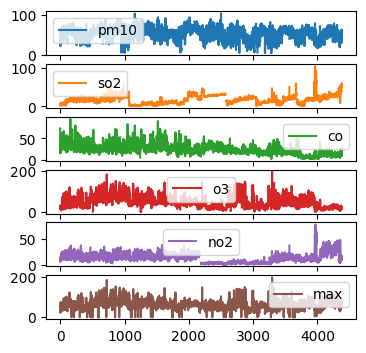

In [ ]:
# melihat persebaran data time series
df.plot(subplots=True, figsize=(4, 4))


In [ ]:
#membuat fungsi untuk visualisasi data

def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
# time_step = df['tanggal']
# series = df['pm10']

# time = np.array(time_step)
# series = np.array(series)

# plot_series(time, series, xlabel='date', ylabel='Monthly Mean Total Sunspot Number')

In [ ]:
# melihat null value
df.isnull().sum()

tanggal       0
pm10        212
so2         175
co          150
o3          203
no2         193
max           9
critical    110
categori      0
dtype: int64

In [ ]:
# membuat dataframe yang lain
data = pd.DataFrame(df)
data

tanggal  pm10   so2    co    o3   no2   max critical categori
0     01/01/2010  60.0   4.0  73.0  27.0  14.0  73.0       CO   SEDANG
1     02/01/2010  32.0   2.0  16.0  33.0   9.0  33.0       O3     BAIK
2     03/01/2010  27.0   2.0  19.0  20.0   9.0  27.0     PM10     BAIK
3     04/01/2010  22.0   2.0  16.0  15.0   6.0  22.0     PM10     BAIK
4     05/01/2010  25.0   2.0  17.0  15.0   8.0  25.0     PM10     BAIK
...          ...   ...   ...   ...   ...   ...   ...      ...      ...
4378  27/12/2021  52.0  61.0  15.0  20.0  15.0  71.0     PM25   SEDANG
4379  28/12/2021  51.0  53.0  15.0  18.0  13.0  65.0     PM25   SEDANG
4380  29/12/2021  31.0  54.0  10.0  24.0  11.0  54.0      SO2   SEDANG
4381  30/12/2021  55.0  53.0  16.0  23.0  14.0  71.0     PM25   SEDANG
4382  31/12/2021  62.0  52.0  23.0  20.0  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
# mengisi nilai null dari setiap kolom

data["pm10"] = data["pm10"].interpolate(method='linear', limit_direction='forward', axis=0)
data["so2"] = data["so2"].interpolate(method='linear', limit_direction='forward', axis=0)
data["co"] = data["co"].interpolate(method='linear', limit_direction='forward', axis=0)
data["o3"] = data["o3"].interpolate(method='linear', limit_direction='forward', axis=0)
data["no2"] = data["no2"].interpolate(method='linear', limit_direction='forward', axis=0)

In [ ]:
data

tanggal  pm10   so2    co    o3   no2   max critical categori
0     01/01/2010  60.0   4.0  73.0  27.0  14.0  73.0       CO   SEDANG
1     02/01/2010  32.0   2.0  16.0  33.0   9.0  33.0       O3     BAIK
2     03/01/2010  27.0   2.0  19.0  20.0   9.0  27.0     PM10     BAIK
3     04/01/2010  22.0   2.0  16.0  15.0   6.0  22.0     PM10     BAIK
4     05/01/2010  25.0   2.0  17.0  15.0   8.0  25.0     PM10     BAIK
...          ...   ...   ...   ...   ...   ...   ...      ...      ...
4378  27/12/2021  52.0  61.0  15.0  20.0  15.0  71.0     PM25   SEDANG
4379  28/12/2021  51.0  53.0  15.0  18.0  13.0  65.0     PM25   SEDANG
4380  29/12/2021  31.0  54.0  10.0  24.0  11.0  54.0      SO2   SEDANG
4381  30/12/2021  55.0  53.0  16.0  23.0  14.0  71.0     PM25   SEDANG
4382  31/12/2021  62.0  52.0  23.0  20.0  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
data.isnull().sum()

tanggal       0
pm10          0
so2           0
co            0
o3            0
no2           0
max           9
critical    110
categori      0
dtype: int64

In [ ]:
# melihat data-data yang berkategori baik
data_baik = data[data['categori']=='BAIK'].sort_values(by='max',ascending=True).reset_index()
data_baik

index     tanggal  pm10   so2         co    o3        no2   max  \
0      3958  02/11/2020  23.0  27.0  15.000000   3.0  32.000000   5.0   
1      3986  30/11/2020  18.0  21.0  16.000000   4.0  27.000000   5.0   
2      3089  17/06/2018  53.0   6.6   8.000000  26.6   2.000000   8.0   
3      1866  10/02/2015  55.0   9.0  21.333333  13.0  15.666667  13.0   
4      3183  19/09/2018   6.0  12.0  16.000000  14.0   4.000000  16.0   
...     ...         ...   ...   ...        ...   ...        ...   ...   
1049   2378  06/07/2016  50.0  28.0  37.000000  24.0   3.000000  50.0   
1050   3792  20/05/2020  50.0  12.0  10.000000  34.0   8.000000  50.0   
1051   3779  07/05/2020  50.0   4.0   3.000000  48.0   9.000000  50.0   
1052   3022  11/04/2018  50.0  22.0  20.000000  25.0   2.000000  50.0   
1053   1148  22/02/2013  50.0   2.0  25.000000  43.0  11.000000  50.0   

     critical categori  
0          O3     BAIK  
1          O3     BAIK  
2          CO     BAIK  
3          O3     BAIK  
4          CO     BAIK  
...       ...      ...  
1049     PM10     BAIK  
1050     PM10     BAIK  
1051     PM10     BAIK  
1052     PM10     BAIK  
1053     PM10     BAIK  

[1054 rows x 10 columns]

In [ ]:
# melihat data-data yang berkategori sedang
data_sedang = data[data['categori']=='SEDANG'].sort_values(by='max',ascending=True).reset_index()
data_sedang

index     tanggal  pm10   so2    co     o3   no2    max critical  \
0      3985  29/11/2020  37.0  56.0  17.0    7.0  24.0    9.0     PM25   
1      3976  20/11/2020  53.0  68.0  20.0    5.0  34.0   10.0     PM25   
2      3959  03/11/2020  43.0  64.0  19.0    6.0  53.0   10.0     PM25   
3      3972  16/11/2020  51.0  70.0  20.0    5.0  42.0   11.0     PM25   
4      3957  01/11/2020  49.0  67.0  18.0   10.0  40.0   11.0     PM25   
...     ...         ...   ...   ...   ...    ...   ...    ...      ...   
3060    820  31/03/2012  51.0  28.0  29.0  100.0  31.0  100.0       O3   
3061    683  15/11/2011  54.0  22.0  27.0  100.0  18.0  100.0       O3   
3062    627  20/09/2011  64.0  16.0  31.0  100.0  23.0  100.0       O3   
3063   1270  24/06/2013  67.0   5.0  36.0  100.0  18.0  100.0       O3   
3064   3248  23/11/2018  43.0  16.0  23.0  100.0   4.0  100.0       O3   

     categori  
0      SEDANG  
1      SEDANG  
2      SEDANG  
3      SEDANG  
4      SEDANG  
...       ...  
3060   SEDANG  
3061   SEDANG  
3062   SEDANG  
3063   SEDANG  
3064   SEDANG  

[3065 rows x 10 columns]

In [ ]:
# melihat data-data yang berkategori buruk
data_buruk = data[data['categori']=='TIDAK SEHAT'].sort_values(by='max',ascending=True).reset_index()
data_buruk

index     tanggal  pm10    so2    co     o3        no2    max critical  \
0     3962  06/11/2020  79.0  106.0  23.0   13.0  49.000000   20.0     PM25   
1     2870  10/11/2017  50.0   19.0  28.0  101.0   5.000000  101.0       O3   
2     4207  09/07/2021  70.0   33.0   9.0   28.0  25.000000  101.0     PM25   
3      985  12/09/2012  73.0   31.0  49.0  101.0  20.000000  101.0       O3   
4     3303  17/01/2019  56.0   22.0  23.0  101.0   7.285714  101.0       O3   
..     ...         ...   ...    ...   ...    ...        ...    ...      ...   
149   2207  17/01/2016  58.0   42.0  19.0  149.0   4.000000  149.0       O3   
150   2871  11/11/2017  56.0   20.0  24.0  150.0   5.000000  150.0       O3   
151    863  13/05/2012  75.0   40.0  27.0  153.0  15.000000  153.0       O3   
152    724  26/12/2011  55.0   16.5  33.0  185.0  10.000000  185.0       O3   
153   3295  09/01/2019  61.0   15.0  28.0  198.0   8.000000  198.0       O3   

        categori  
0    TIDAK SEHAT  
1    TIDAK SEHAT  
2    TIDAK SEHAT  
3    TIDAK SEHAT  
4    TIDAK SEHAT  
..           ...  
149  TIDAK SEHAT  
150  TIDAK SEHAT  
151  TIDAK SEHAT  
152  TIDAK SEHAT  
153  TIDAK SEHAT  

[154 rows x 10 columns]

In [ ]:
data_null = data[data['categori']=='TIDAK ADA DATA'].reset_index()
data_null

index     tanggal       pm10        so2         co    o3        no2  max  \
0      175  25/06/2010  58.666667  18.333333  30.000000  43.0  22.333333  0.0   
1      215  04/08/2010  68.500000  14.500000  33.333333  52.0  21.500000  0.0   
2      304  01/11/2010  36.000000  13.000000  24.000000  30.5  11.000000  0.0   
3      419  24/02/2011  44.333333  14.666667  25.333333  37.0  11.333333  0.0   
4      420  25/02/2011  41.666667  14.333333  24.666667  33.0  11.666667  0.0   
..     ...         ...        ...        ...        ...   ...        ...  ...   
105   3621  01/12/2019  54.500000  19.500000  16.000000  60.5  11.500000  0.0   
106   3631  11/12/2019  57.666667  21.500000  19.333333  49.0  13.000000  0.0   
107   3642  22/12/2019  55.500000  22.500000  24.000000  61.0  14.000000  0.0   
108   3648  28/12/2019  52.000000  26.000000  23.333333  43.0  10.333333  0.0   
109   3649  29/12/2019  52.000000  24.000000  25.666667  45.0   9.666667  0.0   

    critical        categori  
0        NaN  TIDAK ADA DATA  
1        NaN  TIDAK ADA DATA  
2        NaN  TIDAK ADA DATA  
3        NaN  TIDAK ADA DATA  
4        NaN  TIDAK ADA DATA  
..       ...             ...  
105      NaN  TIDAK ADA DATA  
106      NaN  TIDAK ADA DATA  
107      NaN  TIDAK ADA DATA  
108      NaN  TIDAK ADA DATA  
109      NaN  TIDAK ADA DATA  

[110 rows x 10 columns]

In [ ]:
data.isnull().sum()

tanggal       0
pm10          0
so2           0
co            0
o3            0
no2           0
max           9
critical    110
categori      0
dtype: int64

In [ ]:
data[data['categori'] == 'TIDAK ADA DATA']

tanggal       pm10        so2         co    o3        no2  max  \
175   25/06/2010  58.666667  18.333333  30.000000  43.0  22.333333  0.0   
215   04/08/2010  68.500000  14.500000  33.333333  52.0  21.500000  0.0   
304   01/11/2010  36.000000  13.000000  24.000000  30.5  11.000000  0.0   
419   24/02/2011  44.333333  14.666667  25.333333  37.0  11.333333  0.0   
420   25/02/2011  41.666667  14.333333  24.666667  33.0  11.666667  0.0   
...          ...        ...        ...        ...   ...        ...  ...   
3621  01/12/2019  54.500000  19.500000  16.000000  60.5  11.500000  0.0   
3631  11/12/2019  57.666667  21.500000  19.333333  49.0  13.000000  0.0   
3642  22/12/2019  55.500000  22.500000  24.000000  61.0  14.000000  0.0   
3648  28/12/2019  52.000000  26.000000  23.333333  43.0  10.333333  0.0   
3649  29/12/2019  52.000000  24.000000  25.666667  45.0   9.666667  0.0   

     critical        categori  
175       NaN  TIDAK ADA DATA  
215       NaN  TIDAK ADA DATA  
304       NaN  TIDAK ADA DATA  
419       NaN  TIDAK ADA DATA  
420       NaN  TIDAK ADA DATA  
...       ...             ...  
3621      NaN  TIDAK ADA DATA  
3631      NaN  TIDAK ADA DATA  
3642      NaN  TIDAK ADA DATA  
3648      NaN  TIDAK ADA DATA  
3649      NaN  TIDAK ADA DATA  

[110 rows x 9 columns]

In [ ]:
data = data.drop(data[data['categori'] == 'TIDAK ADA DATA'].index)
data

tanggal  pm10   so2    co    o3   no2   max critical categori
0     01/01/2010  60.0   4.0  73.0  27.0  14.0  73.0       CO   SEDANG
1     02/01/2010  32.0   2.0  16.0  33.0   9.0  33.0       O3     BAIK
2     03/01/2010  27.0   2.0  19.0  20.0   9.0  27.0     PM10     BAIK
3     04/01/2010  22.0   2.0  16.0  15.0   6.0  22.0     PM10     BAIK
4     05/01/2010  25.0   2.0  17.0  15.0   8.0  25.0     PM10     BAIK
...          ...   ...   ...   ...   ...   ...   ...      ...      ...
4378  27/12/2021  52.0  61.0  15.0  20.0  15.0  71.0     PM25   SEDANG
4379  28/12/2021  51.0  53.0  15.0  18.0  13.0  65.0     PM25   SEDANG
4380  29/12/2021  31.0  54.0  10.0  24.0  11.0  54.0      SO2   SEDANG
4381  30/12/2021  55.0  53.0  16.0  23.0  14.0  71.0     PM25   SEDANG
4382  31/12/2021  62.0  52.0  23.0  20.0  14.0  85.0     PM25   SEDANG

[4273 rows x 9 columns]

In [ ]:
fill_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/fill_data.csv')
fill_data = fill_data.drop(columns=['index','Unnamed: 0'])
fill_data

tanggal       pm10        so2    co    o3        no2        max  \
0    25/06/2010  58.666667  18.333333  30.0  43.0  22.333333  58.666667   
1    24/06/2016  56.000000  28.500000  33.5  28.5   4.000000  56.000000   
2    28/03/2016  51.000000  26.000000  24.5  21.0   2.000000  51.000000   
3      9/3/2015  51.000000   8.500000  16.0  46.0  14.500000  51.000000   
4    28/01/2015  54.400000   6.600000  29.4  36.2  15.400000  54.400000   
..          ...        ...        ...   ...   ...        ...        ...   
105  19/06/2018  47.000000   5.800000   8.4  21.8   2.000000  47.000000   
106  20/06/2018  44.000000   5.400000   8.6  19.4   2.000000  44.000000   
107    7/7/2018  48.000000   7.333333  15.0  30.0   5.190476  48.000000   
108    8/7/2018  41.000000   6.666667  15.0  40.0   5.380952  41.000000   
109   9/11/2018  53.500000  10.500000  27.5  34.0   4.000000  53.500000   

    critical        categori  
0       pm10  TIDAK ADA DATA  
1       pm10  TIDAK ADA DATA  
2       pm10  TIDAK ADA DATA  
3       pm10  TIDAK ADA DATA  
4       pm10  TIDAK ADA DATA  
..       ...             ...  
105     pm10  TIDAK ADA DATA  
106     pm10  TIDAK ADA DATA  
107     pm10  TIDAK ADA DATA  
108     pm10  TIDAK ADA DATA  
109     pm10  TIDAK ADA DATA  

[110 rows x 9 columns]

In [ ]:
data_clean = pd.concat([data, fill_data])
data_clean.isnull().sum()

tanggal     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [ ]:
data_clean.shape

(4383, 9)

In [ ]:
data_clean

tanggal  pm10        so2    co    o3        no2   max critical  \
0    01/01/2010  60.0   4.000000  73.0  27.0  14.000000  73.0       CO   
1    02/01/2010  32.0   2.000000  16.0  33.0   9.000000  33.0       O3   
2    03/01/2010  27.0   2.000000  19.0  20.0   9.000000  27.0     PM10   
3    04/01/2010  22.0   2.000000  16.0  15.0   6.000000  22.0     PM10   
4    05/01/2010  25.0   2.000000  17.0  15.0   8.000000  25.0     PM10   
..          ...   ...        ...   ...   ...        ...   ...      ...   
105  19/06/2018  47.0   5.800000   8.4  21.8   2.000000  47.0     pm10   
106  20/06/2018  44.0   5.400000   8.6  19.4   2.000000  44.0     pm10   
107    7/7/2018  48.0   7.333333  15.0  30.0   5.190476  48.0     pm10   
108    8/7/2018  41.0   6.666667  15.0  40.0   5.380952  41.0     pm10   
109   9/11/2018  53.5  10.500000  27.5  34.0   4.000000  53.5     pm10   

           categori  
0            SEDANG  
1              BAIK  
2              BAIK  
3              BAIK  
4              BAIK  
..              ...  
105  TIDAK ADA DATA  
106  TIDAK ADA DATA  
107  TIDAK ADA DATA  
108  TIDAK ADA DATA  
109  TIDAK ADA DATA  

[4383 rows x 9 columns]

In [ ]:
data_clean["tanggal"] = pd.to_datetime(data_clean["tanggal"])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 109
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 342.4+ KB


<ipython-input-24-08425f513849>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_clean["tanggal"] = pd.to_datetime(data_clean["tanggal"])


In [ ]:
data_clean = data_clean.sort_values(by='tanggal',ascending=True).reset_index()
data_clean

index    tanggal  pm10   so2    co     o3   no2   max critical categori
0         0 2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1        31 2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2        59 2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3        90 2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4       120 2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...     ...        ...   ...   ...   ...    ...   ...   ...      ...      ...
4378   4378 2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379   4379 2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380   4380 2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381   4381 2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382   4382 2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 10 columns]

In [ ]:
data_clean = data_clean.drop(columns='index')
data_clean

tanggal  pm10   so2    co     o3   no2   max critical categori
0    2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1    2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2    2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3    2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4    2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...         ...   ...   ...   ...    ...   ...   ...      ...      ...
4378 2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379 2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380 2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381 2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382 2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
from google.colab import files
data_clean.to_csv('clean.csv', encoding = 'utf-8-sig')
files.download('clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_clean.describe()

pm10          so2           co           o3          no2  \
count  4383.000000  4383.000000  4383.000000  4383.000000  4383.000000   
mean     52.263404    17.913301    24.891969    49.337554    13.946498   
std      14.508289    10.716175    11.116814    25.536358     8.874350   
min       4.000000     1.000000     3.000000     3.000000     1.000000   
25%      44.000000    10.000000    18.000000    29.000000     6.755000   
50%      54.000000    17.000000    24.000000    46.000000    13.800000   
75%      62.000000    25.000000    31.000000    66.000000    19.000000   
max     104.000000   106.000000    95.000000   198.000000    79.000000   

               max  
count  4383.000000  
mean     61.992529  
std      20.270700  
min       5.000000  
25%      50.000000  
50%      61.000000  
75%      73.000000  
max     198.000000

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


In [ ]:
outliers = find_outliers_IQR(data_clean["pm10"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 60
max outlier value: 104.0
min outlier value: 4.0


In [ ]:
import plotly.express as px

fig = px.box(data_clean, x='pm10')

fig.show()

In [ ]:
data_clean

tanggal  pm10   so2    co     o3   no2   max critical categori
0    2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1    2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2    2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3    2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4    2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...         ...   ...   ...   ...    ...   ...   ...      ...      ...
4378 2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379 2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380 2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381 2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382 2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
data_clean[data_clean['categori'] == 'TIDAK ADA DATA']

tanggal       pm10        so2         co    o3        no2        max  \
10   2010-01-11  36.000000  13.000000  24.000000  30.5  11.000000  36.000000   
97   2010-04-08  68.500000  14.500000  33.333333  52.0  21.500000  68.500000   
175  2010-06-25  58.666667  18.333333  30.000000  43.0  22.333333  58.666667   
419  2011-02-24  44.333333  14.666667  25.333333  37.0  11.333333  44.333333   
420  2011-02-25  41.666667  14.333333  24.666667  33.0  11.666667  41.666667   
...         ...        ...        ...        ...   ...        ...        ...   
3617 2019-11-27  65.500000  22.500000  21.000000  57.0  14.500000  65.500000   
3627 2019-12-07  60.500000  23.000000  19.000000  68.5  14.000000  68.500000   
3642 2019-12-22  55.500000  22.500000  24.000000  61.0  14.000000  61.000000   
3648 2019-12-28  52.000000  26.000000  23.333333  43.0  10.333333  52.000000   
3649 2019-12-29  52.000000  24.000000  25.666667  45.0   9.666667  52.000000   

     critical        categori  
10       pm10  TIDAK ADA DATA  
97       pm10  TIDAK ADA DATA  
175      pm10  TIDAK ADA DATA  
419      pm10  TIDAK ADA DATA  
420      pm10  TIDAK ADA DATA  
...       ...             ...  
3617     pm10  TIDAK ADA DATA  
3627       o3  TIDAK ADA DATA  
3642       o3  TIDAK ADA DATA  
3648     pm10  TIDAK ADA DATA  
3649     pm10  TIDAK ADA DATA  

[110 rows x 9 columns]

## Modelling klasifikasi

In [ ]:
data_klasifikasi = data_clean.drop(data_clean[data_clean['categori'] == 'TIDAK ADA DATA'].index)
data_klasifikasi

tanggal  pm10   so2    co     o3   no2   max critical categori
0    2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1    2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2    2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3    2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4    2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...         ...   ...   ...   ...    ...   ...   ...      ...      ...
4378 2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379 2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380 2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381 2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382 2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4273 rows x 9 columns]

In [ ]:
x = data_klasifikasi[['pm10','so2','co','o3','no2','max']]
y = data_klasifikasi['categori'].astype('category')

In [ ]:
x

pm10   so2    co     o3   no2   max
0     60.0   4.0  73.0  27.00  14.0  73.0
1     41.0   7.0  30.0  17.00  13.0  41.0
2     60.0   5.0  39.0  44.00  19.0  60.0
3     59.0   5.0  46.0  72.75  21.0  59.0
4     60.0  15.5  24.0  28.00  10.0  60.0
...    ...   ...   ...    ...   ...   ...
4378  52.0  61.0  15.0  20.00  15.0  71.0
4379  51.0  53.0  15.0  18.00  13.0  65.0
4380  31.0  54.0  10.0  24.00  11.0  54.0
4381  55.0  53.0  16.0  23.00  14.0  71.0
4382  62.0  52.0  23.0  20.00  14.0  85.0

[4273 rows x 6 columns]

In [ ]:
y

0       SEDANG
1         BAIK
2       SEDANG
3       SEDANG
4       SEDANG
         ...  
4378    SEDANG
4379    SEDANG
4380    SEDANG
4381    SEDANG
4382    SEDANG
Name: categori, Length: 4273, dtype: category
Categories (3, object): ['BAIK', 'SEDANG', 'TIDAK SEHAT']

In [ ]:
#Split Training and Testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [ ]:
DT_model = DecisionTreeClassifier()

#Training Model
DT_model = DT_model.fit(x_train,y_train)

#prediksi
ypred_dt = DT_model.predict(x_test)

In [ ]:
#Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix



In [ ]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       316
      SEDANG       1.00      1.00      1.00       921
 TIDAK SEHAT       1.00      0.98      0.99        45

    accuracy                           1.00      1282
   macro avg       1.00      0.99      1.00      1282
weighted avg       1.00      1.00      1.00      1282



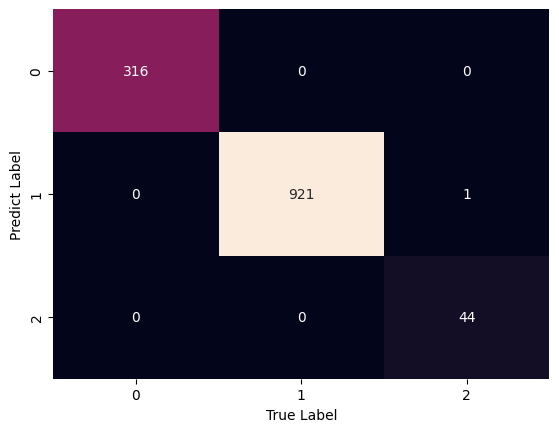

In [ ]:
# Memvisualisasikan Confusion Matrix
import seaborn as sns
mat = confusion_matrix(y_test,ypred_dt)
sns.heatmap(mat.T,annot=True, fmt='d',cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')
plt.show()

<Axes: >

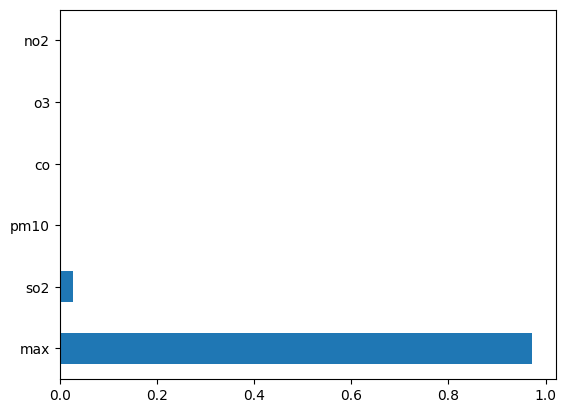

In [ ]:
#Significant faktor dari model

feat_importance = pd.Series(DT_model.feature_importances_, index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')


# Pemodelan Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
RF_model = RandomForestClassifier(n_estimators=200, max_depth=6)

#Training Model
RF_model = RF_model.fit(x_train,y_train)

#prediksi
ypred_rf = RF_model.predict(x_test)


In [ ]:
# save model
from joblib import dump

# Save the trained model to a file
model_filename = 'random_forest_model.joblib'
dump(RF_model, model_filename)

['random_forest_model.joblib']

## Evaluasi Model Random Forest

In [ ]:
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       316
      SEDANG       1.00      1.00      1.00       921
 TIDAK SEHAT       1.00      0.98      0.99        45

    accuracy                           1.00      1282
   macro avg       1.00      0.99      1.00      1282
weighted avg       1.00      1.00      1.00      1282



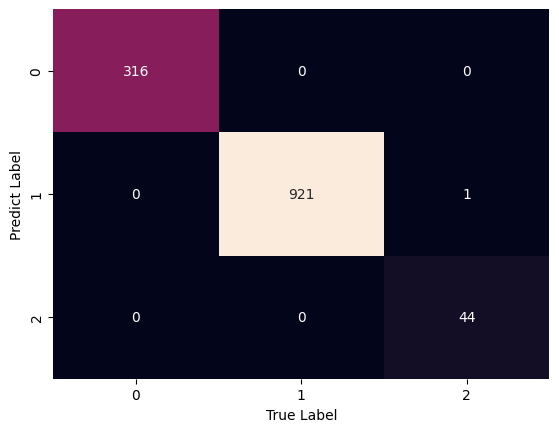

In [ ]:
# Memvisualisasikan Confusion Matrix

mat = confusion_matrix(y_test,ypred_rf)
sns.heatmap(mat.T,annot=True, fmt='d',cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')
plt.show()

<Axes: >

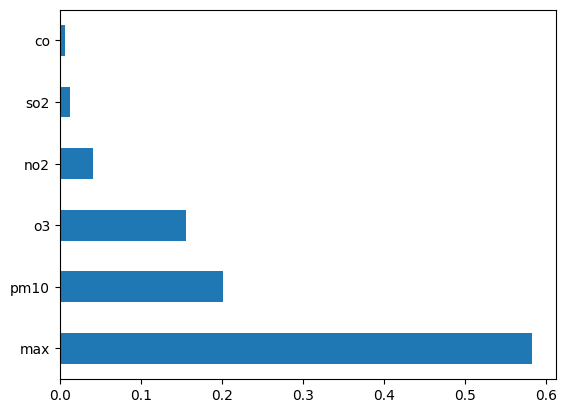

In [ ]:
feat_importance = pd.Series(RF_model.feature_importances_, index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')


In [ ]:
data_test = data_clean[data_clean['categori'] == 'TIDAK ADA DATA']
data_test

tanggal       pm10        so2         co    o3        no2        max  \
10   2010-01-11  36.000000  13.000000  24.000000  30.5  11.000000  36.000000   
97   2010-04-08  68.500000  14.500000  33.333333  52.0  21.500000  68.500000   
175  2010-06-25  58.666667  18.333333  30.000000  43.0  22.333333  58.666667   
419  2011-02-24  44.333333  14.666667  25.333333  37.0  11.333333  44.333333   
420  2011-02-25  41.666667  14.333333  24.666667  33.0  11.666667  41.666667   
...         ...        ...        ...        ...   ...        ...        ...   
3617 2019-11-27  65.500000  22.500000  21.000000  57.0  14.500000  65.500000   
3627 2019-12-07  60.500000  23.000000  19.000000  68.5  14.000000  68.500000   
3642 2019-12-22  55.500000  22.500000  24.000000  61.0  14.000000  61.000000   
3648 2019-12-28  52.000000  26.000000  23.333333  43.0  10.333333  52.000000   
3649 2019-12-29  52.000000  24.000000  25.666667  45.0   9.666667  52.000000   

     critical        categori  
10       pm10  TIDAK ADA DATA  
97       pm10  TIDAK ADA DATA  
175      pm10  TIDAK ADA DATA  
419      pm10  TIDAK ADA DATA  
420      pm10  TIDAK ADA DATA  
...       ...             ...  
3617     pm10  TIDAK ADA DATA  
3627       o3  TIDAK ADA DATA  
3642       o3  TIDAK ADA DATA  
3648     pm10  TIDAK ADA DATA  
3649     pm10  TIDAK ADA DATA  

[110 rows x 9 columns]

In [ ]:
data_chunk = data_test.drop(columns='categori').reset_index(drop=True)
data_chunk

tanggal       pm10        so2         co    o3        no2        max  \
0   2010-01-11  36.000000  13.000000  24.000000  30.5  11.000000  36.000000   
1   2010-04-08  68.500000  14.500000  33.333333  52.0  21.500000  68.500000   
2   2010-06-25  58.666667  18.333333  30.000000  43.0  22.333333  58.666667   
3   2011-02-24  44.333333  14.666667  25.333333  37.0  11.333333  44.333333   
4   2011-02-25  41.666667  14.333333  24.666667  33.0  11.666667  41.666667   
..         ...        ...        ...        ...   ...        ...        ...   
105 2019-11-27  65.500000  22.500000  21.000000  57.0  14.500000  65.500000   
106 2019-12-07  60.500000  23.000000  19.000000  68.5  14.000000  68.500000   
107 2019-12-22  55.500000  22.500000  24.000000  61.0  14.000000  61.000000   
108 2019-12-28  52.000000  26.000000  23.333333  43.0  10.333333  52.000000   
109 2019-12-29  52.000000  24.000000  25.666667  45.0   9.666667  52.000000   

    critical  
0       pm10  
1       pm10  
2       pm10  
3       pm10  
4       pm10  
..       ...  
105     pm10  
106       o3  
107       o3  
108     pm10  
109     pm10  

[110 rows x 8 columns]

In [ ]:
# fill_data.sort_values(by='tanggal',ascending=True).reset_index(inplace = True,drop=True)
# fill_data

In [ ]:
fill_data_new = data_test.drop(columns=['tanggal','critical','categori'])
fill_data_new

pm10        so2         co    o3        no2        max
10    36.000000  13.000000  24.000000  30.5  11.000000  36.000000
97    68.500000  14.500000  33.333333  52.0  21.500000  68.500000
175   58.666667  18.333333  30.000000  43.0  22.333333  58.666667
419   44.333333  14.666667  25.333333  37.0  11.333333  44.333333
420   41.666667  14.333333  24.666667  33.0  11.666667  41.666667
...         ...        ...        ...   ...        ...        ...
3617  65.500000  22.500000  21.000000  57.0  14.500000  65.500000
3627  60.500000  23.000000  19.000000  68.5  14.000000  68.500000
3642  55.500000  22.500000  24.000000  61.0  14.000000  61.000000
3648  52.000000  26.000000  23.333333  43.0  10.333333  52.000000
3649  52.000000  24.000000  25.666667  45.0   9.666667  52.000000

[110 rows x 6 columns]

In [ ]:
ypred = RF_model.predict(fill_data_new)
ypred

array(['BAIK', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK', 'SEDANG', 'SEDANG',
       'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'BAIK', 'SEDANG', 'BAIK', 'SEDANG', 'BAIK', 'SEDANG', 'BAIK',
       'SEDANG', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK',
       'SEDANG', 'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK',
       'BAIK', 'BAIK', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG',
       'SEDANG', 'SEDANG', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'BAIK',
       'BAIK', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK',
       'SEDANG', 'BAIK', 'SEDANG', 'SEDANG', 'BAIK', 'BAIK', 'BAIK',
       'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK',
       '

In [ ]:
fill_data_predictor = pd.DataFrame(ypred, columns=['categori'])
fill_data_predictor

categori
0       BAIK
1     SEDANG
2     SEDANG
3       BAIK
4       BAIK
..       ...
105   SEDANG
106   SEDANG
107   SEDANG
108   SEDANG
109   SEDANG

[110 rows x 1 columns]

In [ ]:
filled_data_ready = pd.concat([data_chunk,fill_data_predictor],axis=1)
filled_data_ready


tanggal       pm10        so2         co    o3        no2        max  \
0   2010-01-11  36.000000  13.000000  24.000000  30.5  11.000000  36.000000   
1   2010-04-08  68.500000  14.500000  33.333333  52.0  21.500000  68.500000   
2   2010-06-25  58.666667  18.333333  30.000000  43.0  22.333333  58.666667   
3   2011-02-24  44.333333  14.666667  25.333333  37.0  11.333333  44.333333   
4   2011-02-25  41.666667  14.333333  24.666667  33.0  11.666667  41.666667   
..         ...        ...        ...        ...   ...        ...        ...   
105 2019-11-27  65.500000  22.500000  21.000000  57.0  14.500000  65.500000   
106 2019-12-07  60.500000  23.000000  19.000000  68.5  14.000000  68.500000   
107 2019-12-22  55.500000  22.500000  24.000000  61.0  14.000000  61.000000   
108 2019-12-28  52.000000  26.000000  23.333333  43.0  10.333333  52.000000   
109 2019-12-29  52.000000  24.000000  25.666667  45.0   9.666667  52.000000   

    critical categori  
0       pm10     BAIK  
1       pm10   SEDANG  
2       pm10   SEDANG  
3       pm10     BAIK  
4       pm10     BAIK  
..       ...      ...  
105     pm10   SEDANG  
106       o3   SEDANG  
107       o3   SEDANG  
108     pm10   SEDANG  
109     pm10   SEDANG  

[110 rows x 9 columns]

In [ ]:
ready_data = pd.concat([data_klasifikasi,filled_data_ready])
ready_data

tanggal  pm10   so2         co     o3        no2   max critical  \
0   2010-01-01  60.0   4.0  73.000000  27.00  14.000000  73.0       CO   
1   2010-01-02  41.0   7.0  30.000000  17.00  13.000000  41.0     PM10   
2   2010-01-03  60.0   5.0  39.000000  44.00  19.000000  60.0     PM10   
3   2010-01-04  59.0   5.0  46.000000  72.75  21.000000  59.0     PM10   
4   2010-01-05  60.0  15.5  24.000000  28.00  10.000000  60.0     PM10   
..         ...   ...   ...        ...    ...        ...   ...      ...   
105 2019-11-27  65.5  22.5  21.000000  57.00  14.500000  65.5     pm10   
106 2019-12-07  60.5  23.0  19.000000  68.50  14.000000  68.5       o3   
107 2019-12-22  55.5  22.5  24.000000  61.00  14.000000  61.0       o3   
108 2019-12-28  52.0  26.0  23.333333  43.00  10.333333  52.0     pm10   
109 2019-12-29  52.0  24.0  25.666667  45.00   9.666667  52.0     pm10   

    categori  
0     SEDANG  
1       BAIK  
2     SEDANG  
3     SEDANG  
4     SEDANG  
..       ...  
105   SEDANG  
106   SEDANG  
107   SEDANG  
108   SEDANG  
109   SEDANG  

[4383 rows x 9 columns]

In [ ]:
ready_data = ready_data.sort_values(by='tanggal',ascending=True)

In [ ]:
ready_data.reset_index(inplace=True,drop=True)

In [ ]:
ready_data

tanggal  pm10   so2    co     o3   no2   max critical categori
0    2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1    2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2    2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3    2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4    2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...         ...   ...   ...   ...    ...   ...   ...      ...      ...
4378 2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379 2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380 2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381 2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382 2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

# TIME SERIES FORCASTING PM10

In [ ]:
ready_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',')
ready_data = ready_data.drop(columns='Unnamed: 0')
ready_data

tanggal  pm10   so2    co     o3   no2   max critical categori
0     2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1     2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2     2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3     2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4     2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...   ...    ...   ...   ...      ...      ...
4378  2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379  2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380  2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381  2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382  2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4383 non-null   float64
 2   so2       4383 non-null   float64
 3   co        4383 non-null   float64
 4   o3        4383 non-null   float64
 5   no2       4383 non-null   float64
 6   max       4383 non-null   float64
 7   critical  4383 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
ready_data['tanggal']=pd.to_datetime(ready_data['tanggal'])

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 308.3+ KB


In [ ]:
# Set kolom 'Date' sebagai indeks
ready_data.set_index('tanggal', inplace=True)
ready_data


pm10   so2    co     o3   no2   max critical categori
tanggal                                                          
2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...    ...   ...   ...      ...      ...
2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 8 columns]

In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

pm10   so2    co     o3   no2
tanggal                                  
2010-01-01  60.0   4.0  73.0  27.00  14.0
2010-01-02  41.0   7.0  30.0  17.00  13.0
2010-01-03  60.0   5.0  39.0  44.00  19.0
2010-01-04  59.0   5.0  46.0  72.75  21.0
2010-01-05  60.0  15.5  24.0  28.00  10.0
...          ...   ...   ...    ...   ...
2021-12-27  52.0  61.0  15.0  20.00  15.0
2021-12-28  51.0  53.0  15.0  18.00  13.0
2021-12-29  31.0  54.0  10.0  24.00  11.0
2021-12-30  55.0  53.0  16.0  23.00  14.0
2021-12-31  62.0  52.0  23.0  20.00  14.0

[4383 rows x 5 columns]

In [ ]:
# Resampling data harian menjadi mingguan
weekly_data = data_timeseries.resample('W-Mon').mean()

In [ ]:
weekly_data

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[627 rows x 5 columns]

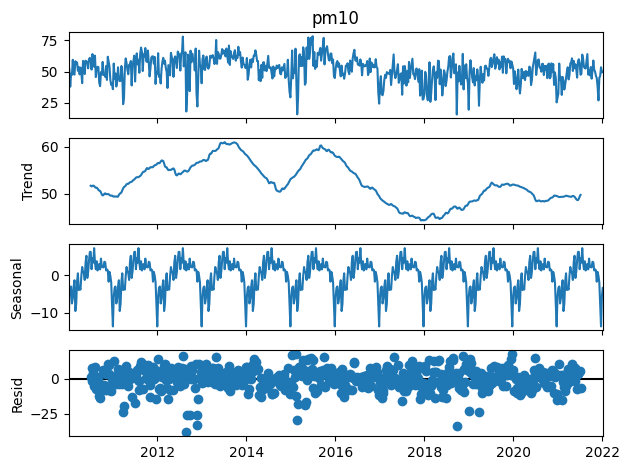

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = weekly_data['pm10']
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# split data training dan testing
train=weekly_data.iloc[:round(len(weekly_data)*0.8)]
test=weekly_data.iloc[round(len(weekly_data)*0.8):]

In [ ]:
train

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2019-07-15  56.371429  23.238095  18.904762  66.428571  15.619048
2019-07-22  60.714286  21.571429  23.428571  58.714286  18.142857
2019-07-29  63.857143  19.285714  21.142857  54.285714  17.571429
2019-08-05  52.285714  16.857143  27.285714  75.142857  17.500000
2019-08-12  54.914286  20.000000  18.428571  62.000000  13.000000

[502 rows x 5 columns]

In [ ]:
test

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
print(train.shape)
print(test.shape)

(502, 5)
(125, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['pm10'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 52))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')



In [ ]:
#membuat prediksi dgn model
forecast_step = 125  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values)
print(confidence_intervals)

2019-08-19    53.024962
2019-08-26    59.682979
2019-09-02    49.011303
2019-09-09    51.904236
2019-09-16    56.407792
                ...    
2021-12-06    53.944695
2021-12-13    38.597800
2021-12-20    35.023387
2021-12-27    25.846205
2022-01-03    49.348393
Freq: W-MON, Name: predicted_mean, Length: 125, dtype: float64
            lower pm10  upper pm10
2019-08-19   33.022891   73.027034
2019-08-26   38.075448   81.290510
2019-09-02   27.147188   70.875418
2019-09-09   29.997571   73.810901
2019-09-16   34.494031   78.321553
...                ...         ...
2021-12-06   28.048093   79.841297
2021-12-13   12.701197   64.494402
2021-12-20    9.126785   60.919989
2021-12-27   -0.050398   51.742807
2022-01-03   23.451791   75.244995

[125 rows x 2 columns]


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               pm10   No. Observations:                  502
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1695.122
Date:                            Fri, 15 Dec 2023   AIC                           3398.244
Time:                                    12:39:30   BIC                           3414.681
Sample:                                01-04-2010   HQIC                          3404.723
                                     - 08-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4086      0.041     10.021      0.000       0.329       0.489
ar.S.L52      -0.6354      0.047    -13.580      0.000      -0.727      -0.544
ar.S.L104     -0.2551      0.046     -5.532      0.000      -0.345      -0.165
sigma2       104.1487      5.611     18.563      0.000      93.152     115.145
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                35.85
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.44
Prob(H) (two-sided):                  0.85   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

predicted_mean
2019-08-19       53.024962
2019-08-26       59.682979
2019-09-02       49.011303
2019-09-09       51.904236
2019-09-16       56.407792
...                    ...
2021-12-06       53.944695
2021-12-13       38.597800
2021-12-20       35.023387
2021-12-27       25.846205
2022-01-03       49.348393

[125 rows x 1 columns]

In [ ]:
predicted_val.describe()

predicted_mean
count      125.000000
mean        47.138429
std          7.274740
min         25.846205
25%         42.725462
50%         48.738308
75%         51.731552
max         61.952955

In [ ]:
tess = weekly_data.iloc[round(len(weekly_data)*0.8):]
tess

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
predicted_val1 = pd.concat([tess['pm10'], predicted_val],axis=1)
predicted_val1

pm10  predicted_mean
2019-08-19  61.500000       53.024962
2019-08-26  56.428571       59.682979
2019-09-02  59.571429       49.011303
2019-09-09  51.714286       51.904236
2019-09-16  57.314286       56.407792
...               ...             ...
2021-12-06  44.857143       53.944695
2021-12-13  46.428571       38.597800
2021-12-20  53.428571       35.023387
2021-12-27  49.285714       25.846205
2022-01-03  49.750000       49.348393

[125 rows x 2 columns]

In [ ]:
from google.colab import files
predicted_val1.to_csv('actual_vs_predicted_pm10.csv', encoding = 'utf-8-sig',index=False)
files.download('actual_vs_predicted_pm10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='tanggal'>

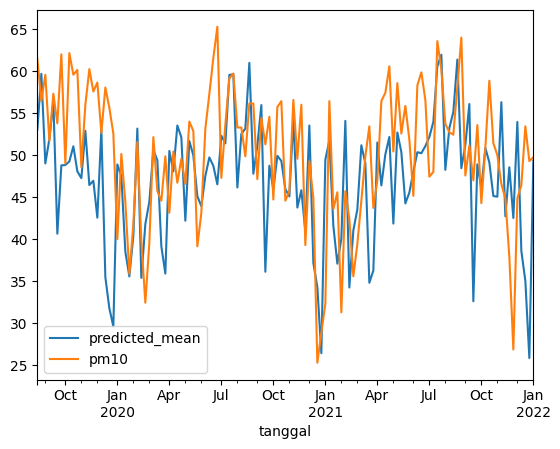

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
test['pm10'].plot(legend=True)

##Evaluasi Seasonal Arima

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

rmse_value = mean_absolute_percentage_error(test['pm10'], predicted_val1['predicted_mean'])
# Menampilkan hasil RMSE
print("RMSE:", rmse_value)

RMSE: 0.13700883355051716


## PM10 predicted


In [ ]:
#membuat prediksi dgn model
forecast_step = 281  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values_pm10=predictions.predicted_mean
confidence_intervals_pm10=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values_pm10)
print(confidence_intervals_pm10)

2019-08-19    53.024962
2019-08-26    59.682979
2019-09-02    49.011303
2019-09-09    51.904236
2019-09-16    56.407792
                ...    
2024-12-02    53.708762
2024-12-09    37.778854
2024-12-16    34.385669
2024-12-23    26.502553
2024-12-30    49.323321
Freq: W-MON, Name: predicted_mean, Length: 281, dtype: float64
            lower pm10  upper pm10
2019-08-19   33.022891   73.027034
2019-08-26   38.075448   81.290510
2019-09-02   27.147188   70.875418
2019-09-09   29.997571   73.810901
2019-09-16   34.494031   78.321553
...                ...         ...
2024-12-02   20.697281   86.720243
2024-12-09    4.767373   70.790335
2024-12-16    1.374188   67.397150
2024-12-23   -6.508928   59.514034
2024-12-30   16.311840   82.334802

[281 rows x 2 columns]


In [ ]:
predicted_val_pm10 = pd.DataFrame(forecast_values_pm10)
predicted_val_pm10

predicted_mean
2019-08-19       53.024962
2019-08-26       59.682979
2019-09-02       49.011303
2019-09-09       51.904236
2019-09-16       56.407792
...                    ...
2024-12-02       53.708762
2024-12-09       37.778854
2024-12-16       34.385669
2024-12-23       26.502553
2024-12-30       49.323321

[281 rows x 1 columns]

In [ ]:
import datetime
df_pm10 = predicted_val_pm10.loc[datetime.datetime(2022,1,3):]

In [ ]:
df_pm10 = df_pm10.rename(columns={'predicted_mean': 'pm10'})
df_pm10

pm10
2022-01-03  49.348393
2022-01-10  51.988093
2022-01-17  43.032691
2022-01-24  38.593962
2022-01-31  40.499493
...               ...
2024-12-02  53.708762
2024-12-09  37.778854
2024-12-16  34.385669
2024-12-23  26.502553
2024-12-30  49.323321

[157 rows x 1 columns]

In [ ]:
from google.colab import files
df_pm10.to_csv('pm10.csv', encoding = 'utf-8-sig')
files.download('pm10.csv')

# TIME SERIES FORCASTING SO2

In [ ]:
ready_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',')
ready_data = ready_data.drop(columns='Unnamed: 0')
ready_data

tanggal  pm10   so2    co     o3   no2   max critical categori
0     2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1     2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2     2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3     2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4     2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...   ...    ...   ...   ...      ...      ...
4378  2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379  2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380  2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381  2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382  2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4383 non-null   float64
 2   so2       4383 non-null   float64
 3   co        4383 non-null   float64
 4   o3        4383 non-null   float64
 5   no2       4383 non-null   float64
 6   max       4383 non-null   float64
 7   critical  4383 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
ready_data['tanggal']=pd.to_datetime(ready_data['tanggal'])

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 308.3+ KB


In [ ]:
# Set kolom 'Date' sebagai indeks
ready_data.set_index('tanggal', inplace=True)
ready_data


pm10   so2    co     o3   no2   max critical categori
tanggal                                                          
2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...    ...   ...   ...      ...      ...
2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 8 columns]

In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

pm10   so2    co     o3   no2
tanggal                                  
2010-01-01  60.0   4.0  73.0  27.00  14.0
2010-01-02  41.0   7.0  30.0  17.00  13.0
2010-01-03  60.0   5.0  39.0  44.00  19.0
2010-01-04  59.0   5.0  46.0  72.75  21.0
2010-01-05  60.0  15.5  24.0  28.00  10.0
...          ...   ...   ...    ...   ...
2021-12-27  52.0  61.0  15.0  20.00  15.0
2021-12-28  51.0  53.0  15.0  18.00  13.0
2021-12-29  31.0  54.0  10.0  24.00  11.0
2021-12-30  55.0  53.0  16.0  23.00  14.0
2021-12-31  62.0  52.0  23.0  20.00  14.0

[4383 rows x 5 columns]

In [ ]:
# Resampling data harian menjadi mingguan
weekly_data = data_timeseries.resample('W-Mon').mean()

In [ ]:
weekly_data

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[627 rows x 5 columns]

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# split data training dan testing
train=weekly_data.iloc[:round(len(weekly_data)*0.8)]
test=weekly_data.iloc[round(len(weekly_data)*0.8):]

In [ ]:
train

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2019-07-15  56.371429  23.238095  18.904762  66.428571  15.619048
2019-07-22  60.714286  21.571429  23.428571  58.714286  18.142857
2019-07-29  63.857143  19.285714  21.142857  54.285714  17.571429
2019-08-05  52.285714  16.857143  27.285714  75.142857  17.500000
2019-08-12  54.914286  20.000000  18.428571  62.000000  13.000000

[502 rows x 5 columns]

In [ ]:
test

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
print(train.shape)
print(test.shape)

(502, 5)
(125, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['so2'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 52))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')



In [ ]:
#membuat prediksi dgn model
forecast_step = 125  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values)
print(confidence_intervals)

2019-08-19    19.557054
2019-08-26    19.871948
2019-09-02    20.903198
2019-09-09    19.610558
2019-09-16    19.897714
                ...    
2021-12-06    15.671000
2021-12-13    18.110187
2021-12-20    17.972999
2021-12-27    17.982524
2022-01-03    12.780974
Freq: W-MON, Name: predicted_mean, Length: 125, dtype: float64
            lower so2  upper so2
2019-08-19   8.609252  30.504855
2019-08-26   5.398917  34.344979
2019-09-02   4.275734  37.530662
2019-09-09   1.539283  37.681832
2019-09-16   0.818166  38.977262
...               ...        ...
2021-12-06 -10.629925  41.971925
2021-12-13  -8.195309  44.415683
2021-12-20  -8.335914  44.281912
2021-12-27  -8.328944  44.293991
2022-01-03 -13.532403  39.094352

[125 rows x 2 columns]


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                so2   No. Observations:                  502
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1422.621
Date:                            Fri, 01 Dec 2023   AIC                           2853.241
Time:                                    04:35:23   BIC                           2869.678
Sample:                                01-04-2010   HQIC                          2859.720
                                     - 08-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8647      0.023     36.981      0.000       0.819       0.911
ar.S.L52      -0.5799      0.035    -16.572      0.000      -0.648      -0.511
ar.S.L104     -0.2263      0.041     -5.547      0.000      -0.306      -0.146
sigma2        31.2002      1.482     21.060      0.000      28.297      34.104
===================================================================================
Ljung-Box (L1) (Q):                  25.38   Jarque-Bera (JB):               120.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

predicted_mean
2019-08-19       19.557054
2019-08-26       19.871948
2019-09-02       20.903198
2019-09-09       19.610558
2019-09-16       19.897714
...                    ...
2021-12-06       15.671000
2021-12-13       18.110187
2021-12-20       17.972999
2021-12-27       17.982524
2022-01-03       12.780974

[125 rows x 1 columns]

In [ ]:
predicted_val.describe()

predicted_mean
count      125.000000
mean        16.582894
std          2.529545
min          9.496854
25%         15.097712
50%         16.681824
75%         18.339590
max         21.821323

In [ ]:
tess = weekly_data.iloc[round(len(weekly_data)*0.8):]
tess

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
predicted_val1 = pd.concat([tess['so2'], predicted_val],axis=1)
predicted_val1

so2  predicted_mean
2019-08-19  17.714286       19.557054
2019-08-26  19.142857       19.871948
2019-09-02  17.000000       20.903198
2019-09-09  14.285714       19.610558
2019-09-16  21.714286       19.897714
...               ...             ...
2021-12-06  24.571429       15.671000
2021-12-13  31.000000       18.110187
2021-12-20  40.857143       17.972999
2021-12-27  53.571429       17.982524
2022-01-03  53.000000       12.780974

[125 rows x 2 columns]

<Axes: xlabel='tanggal'>

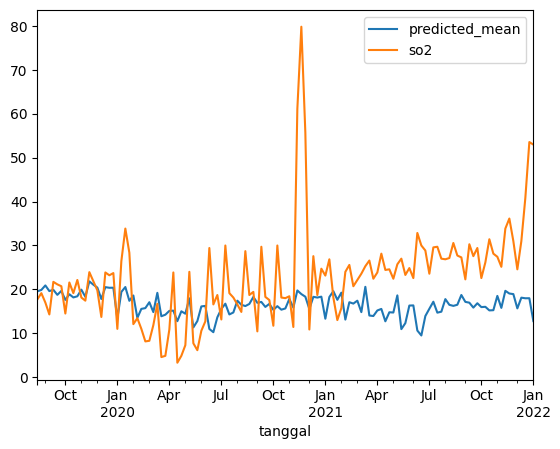

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
test['so2'].plot(legend=True)

##Evaluasi Seasonal Arima

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
# Menggunakan fungsi rmse
rmse_value = rmse(test['so2'], predicted_val1['predicted_mean'])

# Menampilkan hasil RMSE
print("RMSE:", rmse_value)

RMSE: 12.411416906411473


# TIME SERIES FORCASTING CO

In [ ]:
ready_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',')
ready_data = ready_data.drop(columns='Unnamed: 0')
ready_data

tanggal  pm10   so2    co     o3   no2   max critical categori
0     2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1     2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2     2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3     2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4     2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...   ...    ...   ...   ...      ...      ...
4378  2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379  2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380  2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381  2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382  2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4383 non-null   float64
 2   so2       4383 non-null   float64
 3   co        4383 non-null   float64
 4   o3        4383 non-null   float64
 5   no2       4383 non-null   float64
 6   max       4383 non-null   float64
 7   critical  4383 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
ready_data['tanggal']=pd.to_datetime(ready_data['tanggal'])

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 308.3+ KB


In [ ]:
# Set kolom 'Date' sebagai indeks
ready_data.set_index('tanggal', inplace=True)
ready_data


pm10   so2    co     o3   no2   max critical categori
tanggal                                                          
2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...    ...   ...   ...      ...      ...
2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 8 columns]

In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

pm10   so2    co     o3   no2
tanggal                                  
2010-01-01  60.0   4.0  73.0  27.00  14.0
2010-01-02  41.0   7.0  30.0  17.00  13.0
2010-01-03  60.0   5.0  39.0  44.00  19.0
2010-01-04  59.0   5.0  46.0  72.75  21.0
2010-01-05  60.0  15.5  24.0  28.00  10.0
...          ...   ...   ...    ...   ...
2021-12-27  52.0  61.0  15.0  20.00  15.0
2021-12-28  51.0  53.0  15.0  18.00  13.0
2021-12-29  31.0  54.0  10.0  24.00  11.0
2021-12-30  55.0  53.0  16.0  23.00  14.0
2021-12-31  62.0  52.0  23.0  20.00  14.0

[4383 rows x 5 columns]

In [ ]:
# Resampling data harian menjadi mingguan
weekly_data = data_timeseries.resample('W-Mon').mean()

In [ ]:
weekly_data

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[627 rows x 5 columns]

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# split data training dan testing
train=weekly_data.iloc[:round(len(weekly_data)*0.8)]
test=weekly_data.iloc[round(len(weekly_data)*0.8):]

In [ ]:
train

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2019-07-15  56.371429  23.238095  18.904762  66.428571  15.619048
2019-07-22  60.714286  21.571429  23.428571  58.714286  18.142857
2019-07-29  63.857143  19.285714  21.142857  54.285714  17.571429
2019-08-05  52.285714  16.857143  27.285714  75.142857  17.500000
2019-08-12  54.914286  20.000000  18.428571  62.000000  13.000000

[502 rows x 5 columns]

In [ ]:
test

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
print(train.shape)
print(test.shape)

(502, 5)
(125, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['co'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 52))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')



In [ ]:
#membuat prediksi dgn model
forecast_step = 125  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values)
print(confidence_intervals)

2019-08-19    16.271325
2019-08-26    19.218447
2019-09-02    22.078341
2019-09-09    21.057337
2019-09-16    20.039288
                ...    
2021-12-06    18.200233
2021-12-13    17.637513
2021-12-20    14.390387
2021-12-27    12.001267
2022-01-03    22.917999
Freq: W-MON, Name: predicted_mean, Length: 125, dtype: float64
            lower co   upper co
2019-08-19  4.954282  27.588368
2019-08-26  6.250044  32.186850
2019-09-02  8.634488  35.522193
2019-09-09  7.468028  34.646647
2019-09-16  6.404750  33.673825
...              ...        ...
2021-12-06  1.600606  34.799859
2021-12-13  1.037887  34.237140
2021-12-20 -2.209240  30.990014
2021-12-27 -4.598360  28.600893
2022-01-03  6.318372  39.517626

[125 rows x 2 columns]


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 co   No. Observations:                  502
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1436.203
Date:                            Fri, 01 Dec 2023   AIC                           2880.406
Time:                                    04:43:05   BIC                           2896.843
Sample:                                01-04-2010   HQIC                          2886.884
                                     - 08-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5596      0.034     16.295      0.000       0.492       0.627
ar.S.L52      -0.5394      0.046    -11.841      0.000      -0.629      -0.450
ar.S.L104     -0.2362      0.043     -5.451      0.000      -0.321      -0.151
sigma2        33.3403      1.880     17.735      0.000      29.656      37.025
===================================================================================
Ljung-Box (L1) (Q):                  16.83   Jarque-Bera (JB):                38.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

predicted_mean
2019-08-19       16.271325
2019-08-26       19.218447
2019-09-02       22.078341
2019-09-09       21.057337
2019-09-16       20.039288
...                    ...
2021-12-06       18.200233
2021-12-13       17.637513
2021-12-20       14.390387
2021-12-27       12.001267
2022-01-03       22.917999

[125 rows x 1 columns]

In [ ]:
predicted_val.describe()

predicted_mean
count      125.000000
mean        20.697439
std          2.722054
min         12.001267
25%         19.218447
50%         21.015768
75%         22.283567
max         28.008243

In [ ]:
tess = weekly_data.iloc[round(len(weekly_data)*0.8):]
tess

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
predicted_val1 = pd.concat([tess['co'], predicted_val],axis=1)
predicted_val1

co  predicted_mean
2019-08-19  20.285714       16.271325
2019-08-26  21.000000       19.218447
2019-09-02  22.571429       22.078341
2019-09-09  22.857143       21.057337
2019-09-16  18.142857       20.039288
...               ...             ...
2021-12-06  13.714286       18.200233
2021-12-13   9.857143       17.637513
2021-12-20  18.142857       14.390387
2021-12-27  17.571429       12.001267
2022-01-03  16.000000       22.917999

[125 rows x 2 columns]

<Axes: xlabel='tanggal'>

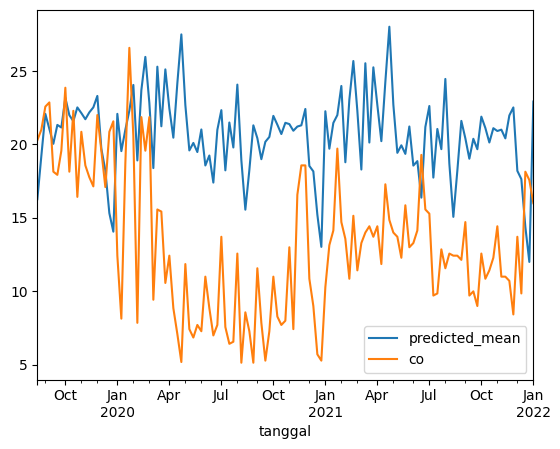

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
test['co'].plot(legend=True)

##Evaluasi Seasonal Arima

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
# Menggunakan fungsi rmse
rmse_value = rmse(test['co'], predicted_val1['predicted_mean'])

# Menampilkan hasil RMSE
print("RMSE:", rmse_value)

RMSE: 9.074615538612333


# TIME SERIES FORECASTING O3


In [ ]:
ready_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',')
ready_data = ready_data.drop(columns='Unnamed: 0')
ready_data

tanggal  pm10   so2    co     o3   no2   max critical categori
0     2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1     2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2     2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3     2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4     2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...   ...    ...   ...   ...      ...      ...
4378  2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379  2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380  2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381  2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382  2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4383 non-null   float64
 2   so2       4383 non-null   float64
 3   co        4383 non-null   float64
 4   o3        4383 non-null   float64
 5   no2       4383 non-null   float64
 6   max       4383 non-null   float64
 7   critical  4383 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
ready_data['tanggal']=pd.to_datetime(ready_data['tanggal'])

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 308.3+ KB


In [ ]:
# Set kolom 'Date' sebagai indeks
ready_data.set_index('tanggal', inplace=True)
ready_data

pm10   so2    co     o3   no2   max critical categori
tanggal                                                          
2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...    ...   ...   ...      ...      ...
2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 8 columns]

In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

pm10   so2    co     o3   no2
tanggal                                  
2010-01-01  60.0   4.0  73.0  27.00  14.0
2010-01-02  41.0   7.0  30.0  17.00  13.0
2010-01-03  60.0   5.0  39.0  44.00  19.0
2010-01-04  59.0   5.0  46.0  72.75  21.0
2010-01-05  60.0  15.5  24.0  28.00  10.0
...          ...   ...   ...    ...   ...
2021-12-27  52.0  61.0  15.0  20.00  15.0
2021-12-28  51.0  53.0  15.0  18.00  13.0
2021-12-29  31.0  54.0  10.0  24.00  11.0
2021-12-30  55.0  53.0  16.0  23.00  14.0
2021-12-31  62.0  52.0  23.0  20.00  14.0

[4383 rows x 5 columns]

In [ ]:
# Resampling data harian menjadi mingguan
weekly_data = data_timeseries.resample('W-Mon').mean()

In [ ]:
weekly_data

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[627 rows x 5 columns]

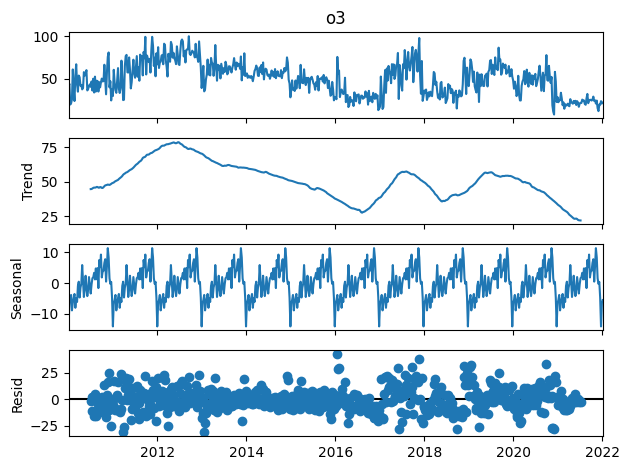

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = weekly_data['o3']
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# split data training dan testing
train=weekly_data.iloc[:round(len(weekly_data)*0.8)]
test=weekly_data.iloc[round(len(weekly_data)*0.8):]

In [ ]:
train

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2019-07-15  56.371429  23.238095  18.904762  66.428571  15.619048
2019-07-22  60.714286  21.571429  23.428571  58.714286  18.142857
2019-07-29  63.857143  19.285714  21.142857  54.285714  17.571429
2019-08-05  52.285714  16.857143  27.285714  75.142857  17.500000
2019-08-12  54.914286  20.000000  18.428571  62.000000  13.000000

[502 rows x 5 columns]

In [ ]:
test

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
print(train.shape)
print(test.shape)

(502, 5)
(125, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['o3'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 52))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')


In [ ]:
#membuat prediksi dgn model
forecast_step = 125  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasil prediksi
print(forecast_values)
print(confidence_intervals)

2019-08-19    64.340271
2019-08-26    49.970217
2019-09-02    50.695718
2019-09-09    49.928394
2019-09-16    54.763906
                ...    
2021-12-06    42.839824
2021-12-13    43.960783
2021-12-20    34.620133
2021-12-27    35.853663
2022-01-03    48.730810
Freq: W-MON, Name: predicted_mean, Length: 125, dtype: float64
             lower o3   upper o3
2019-08-19  35.066687  93.613854
2019-08-26  14.061402  85.879032
2019-09-02  11.866263  89.525174
2019-09-09   9.705332  90.151456
2019-09-16  13.855512  95.672301
...               ...        ...
2021-12-06  -5.029842  90.709490
2021-12-13  -3.908903  91.830469
2021-12-20 -13.249562  82.489829
2021-12-27 -12.016038  83.723364
2022-01-03   0.861107  96.600514

[125 rows x 2 columns]


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 o3   No. Observations:                  502
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1870.010
Date:                            Fri, 15 Dec 2023   AIC                           3748.020
Time:                                    12:29:11   BIC                           3764.457
Sample:                                01-04-2010   HQIC                          3754.498
                                     - 08-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7104      0.035     20.345      0.000       0.642       0.779
ar.S.L52      -0.7181      0.050    -14.490      0.000      -0.815      -0.621
ar.S.L104     -0.3026      0.058     -5.231      0.000      -0.416      -0.189
sigma2       223.0774     14.554     15.328      0.000     194.552     251.603
===================================================================================
Ljung-Box (L1) (Q):                  21.04   Jarque-Bera (JB):                17.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.39
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

predicted_mean
2019-08-19       64.340271
2019-08-26       49.970217
2019-09-02       50.695718
2019-09-09       49.928394
2019-09-16       54.763906
...                    ...
2021-12-06       42.839824
2021-12-13       43.960783
2021-12-20       34.620133
2021-12-27       35.853663
2022-01-03       48.730810

[125 rows x 1 columns]

In [ ]:
predicted_val.describe()

predicted_mean
count      125.000000
mean        46.508184
std          8.464590
min         28.554487
25%         40.510184
50%         46.497915
75%         51.904661
max         78.611714

In [ ]:
tess = weekly_data.iloc[round(len(weekly_data)*0.8):]
tess

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
predicted_val1 = pd.concat([tess['o3'], predicted_val],axis=1)
predicted_val1

o3  predicted_mean
2019-08-19  64.142857       64.340271
2019-08-26  60.000000       49.970217
2019-09-02  86.714286       50.695718
2019-09-09  71.000000       49.928394
2019-09-16  72.714286       54.763906
...               ...             ...
2021-12-06  19.142857       42.839824
2021-12-13  19.000000       43.960783
2021-12-20  23.142857       34.620133
2021-12-27  20.428571       35.853663
2022-01-03  21.250000       48.730810

[125 rows x 2 columns]

In [ ]:
from google.colab import files
predicted_val1.to_csv('actual_vs_predicted_o3.csv', encoding = 'utf-8-sig',index=False)
files.download('actual_vs_predicted_o3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='tanggal'>

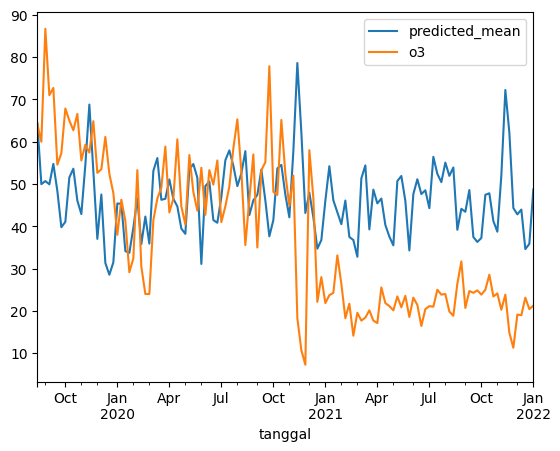

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
test['o3'].plot(legend=True)

## EVALUASI SEASONAL ARIMA

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

mean_absolute_percentage_error(test['o3'], predicted_val1['predicted_mean'])
# Menampilkan hasil RMSE
print("RMSE:", rmse_value)

RMSE: 20.836933644563338


# **Time Series Forcasting NO2**

In [ ]:
ready_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',')
ready_data = ready_data.drop(columns='Unnamed: 0')
ready_data

tanggal  pm10   so2    co     o3   no2   max critical categori
0     2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
1     2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2     2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
3     2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
4     2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...   ...    ...   ...   ...      ...      ...
4378  2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
4379  2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
4380  2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
4381  2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
4382  2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 9 columns]

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4383 non-null   float64
 2   so2       4383 non-null   float64
 3   co        4383 non-null   float64
 4   o3        4383 non-null   float64
 5   no2       4383 non-null   float64
 6   max       4383 non-null   float64
 7   critical  4383 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
ready_data['tanggal']=pd.to_datetime(ready_data['tanggal'])

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 308.3+ KB


In [ ]:
# Set kolom 'Date' sebagai indeks
ready_data.set_index('tanggal', inplace=True)
ready_data


pm10   so2    co     o3   no2   max critical categori
tanggal                                                          
2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG
...          ...   ...   ...    ...   ...   ...      ...      ...
2021-12-27  52.0  61.0  15.0  20.00  15.0  71.0     PM25   SEDANG
2021-12-28  51.0  53.0  15.0  18.00  13.0  65.0     PM25   SEDANG
2021-12-29  31.0  54.0  10.0  24.00  11.0  54.0      SO2   SEDANG
2021-12-30  55.0  53.0  16.0  23.00  14.0  71.0     PM25   SEDANG
2021-12-31  62.0  52.0  23.0  20.00  14.0  85.0     PM25   SEDANG

[4383 rows x 8 columns]

In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

pm10   so2    co     o3   no2
tanggal                                  
2010-01-01  60.0   4.0  73.0  27.00  14.0
2010-01-02  41.0   7.0  30.0  17.00  13.0
2010-01-03  60.0   5.0  39.0  44.00  19.0
2010-01-04  59.0   5.0  46.0  72.75  21.0
2010-01-05  60.0  15.5  24.0  28.00  10.0
...          ...   ...   ...    ...   ...
2021-12-27  52.0  61.0  15.0  20.00  15.0
2021-12-28  51.0  53.0  15.0  18.00  13.0
2021-12-29  31.0  54.0  10.0  24.00  11.0
2021-12-30  55.0  53.0  16.0  23.00  14.0
2021-12-31  62.0  52.0  23.0  20.00  14.0

[4383 rows x 5 columns]

In [ ]:
# Resampling data harian menjadi mingguan
weekly_data = data_timeseries.resample('W-Mon').mean()

In [ ]:
weekly_data

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[627 rows x 5 columns]

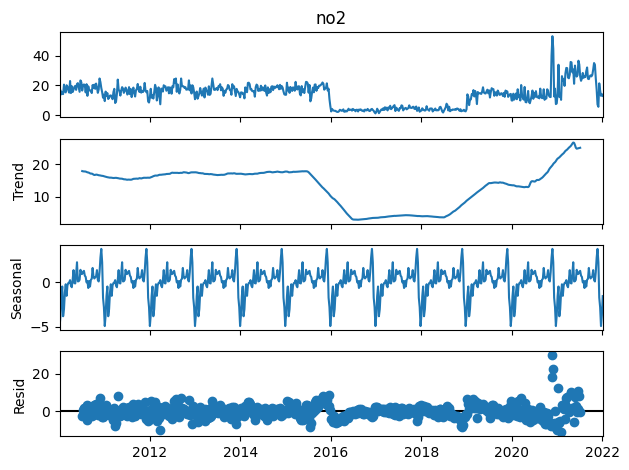

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = weekly_data['no2']
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# split data training dan testing
train=weekly_data.iloc[:round(len(weekly_data)*0.8)]
test=weekly_data.iloc[round(len(weekly_data)*0.8):]

In [ ]:
train

pm10        so2         co         o3        no2
tanggal                                                          
2010-01-04  55.000000   5.250000  47.000000  40.187500  16.750000
2010-01-11  51.571429  16.357143  26.714286  43.785714  16.714286
2010-01-18  37.857143   6.571429  30.142857  19.142857  14.000000
2010-01-25  48.285714   4.142857  41.714286  20.571429  15.571429
2010-02-01  47.285714   6.285714  33.142857  25.142857  14.142857
...               ...        ...        ...        ...        ...
2019-07-15  56.371429  23.238095  18.904762  66.428571  15.619048
2019-07-22  60.714286  21.571429  23.428571  58.714286  18.142857
2019-07-29  63.857143  19.285714  21.142857  54.285714  17.571429
2019-08-05  52.285714  16.857143  27.285714  75.142857  17.500000
2019-08-12  54.914286  20.000000  18.428571  62.000000  13.000000

[502 rows x 5 columns]

In [ ]:
test

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
print(train.shape)
print(test.shape)

(502, 5)
(125, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['co'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 52))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')



In [ ]:
#membuat prediksi dgn model
forecast_step = 125  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values)
print(confidence_intervals)

2019-08-19    16.271325
2019-08-26    19.218447
2019-09-02    22.078341
2019-09-09    21.057337
2019-09-16    20.039288
                ...    
2021-12-06    18.200233
2021-12-13    17.637513
2021-12-20    14.390387
2021-12-27    12.001267
2022-01-03    22.917999
Freq: W-MON, Name: predicted_mean, Length: 125, dtype: float64
            lower co   upper co
2019-08-19  4.954282  27.588368
2019-08-26  6.250044  32.186850
2019-09-02  8.634488  35.522193
2019-09-09  7.468028  34.646647
2019-09-16  6.404750  33.673825
...              ...        ...
2021-12-06  1.600606  34.799859
2021-12-13  1.037887  34.237140
2021-12-20 -2.209240  30.990014
2021-12-27 -4.598360  28.600893
2022-01-03  6.318372  39.517626

[125 rows x 2 columns]


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 co   No. Observations:                  502
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1436.203
Date:                            Wed, 13 Dec 2023   AIC                           2880.406
Time:                                    14:52:07   BIC                           2896.843
Sample:                                01-04-2010   HQIC                          2886.884
                                     - 08-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5596      0.034     16.295      0.000       0.492       0.627
ar.S.L52      -0.5394      0.046    -11.841      0.000      -0.629      -0.450
ar.S.L104     -0.2362      0.043     -5.451      0.000      -0.321      -0.151
sigma2        33.3403      1.880     17.735      0.000      29.656      37.025
===================================================================================
Ljung-Box (L1) (Q):                  16.83   Jarque-Bera (JB):                38.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

predicted_mean
2019-08-19       16.271325
2019-08-26       19.218447
2019-09-02       22.078341
2019-09-09       21.057337
2019-09-16       20.039288
...                    ...
2021-12-06       18.200233
2021-12-13       17.637513
2021-12-20       14.390387
2021-12-27       12.001267
2022-01-03       22.917999

[125 rows x 1 columns]

In [ ]:
predicted_val.describe()

predicted_mean
count      125.000000
mean        20.697439
std          2.722054
min         12.001267
25%         19.218447
50%         21.015768
75%         22.283567
max         28.008243

In [ ]:
tess = weekly_data.iloc[round(len(weekly_data)*0.8):]
tess

pm10        so2         co         o3        no2
tanggal                                                          
2019-08-19  61.500000  17.714286  20.285714  64.142857  15.285714
2019-08-26  56.428571  19.142857  21.000000  60.000000  15.285714
2019-09-02  59.571429  17.000000  22.571429  86.714286  13.142857
2019-09-09  51.714286  14.285714  22.857143  71.000000  16.571429
2019-09-16  57.314286  21.714286  18.142857  72.714286  15.285714
...               ...        ...        ...        ...        ...
2021-12-06  44.857143  24.571429  13.714286  19.142857  21.428571
2021-12-13  46.428571  31.000000   9.857143  19.000000  16.571429
2021-12-20  53.428571  40.857143  18.142857  23.142857  13.000000
2021-12-27  49.285714  53.571429  17.571429  20.428571  14.142857
2022-01-03  49.750000  53.000000  16.000000  21.250000  13.000000

[125 rows x 5 columns]

In [ ]:
predicted_val1 = pd.concat([tess['no2'], predicted_val],axis=1)
predicted_val1

no2  predicted_mean
2019-08-19  15.285714       16.271325
2019-08-26  15.285714       19.218447
2019-09-02  13.142857       22.078341
2019-09-09  16.571429       21.057337
2019-09-16  15.285714       20.039288
...               ...             ...
2021-12-06  21.428571       18.200233
2021-12-13  16.571429       17.637513
2021-12-20  13.000000       14.390387
2021-12-27  14.142857       12.001267
2022-01-03  13.000000       22.917999

[125 rows x 2 columns]

In [ ]:
from google.colab import files
predicted_val1.to_csv('actual_vs_predicted_no2.csv', encoding = 'utf-8-sig',index=False)
files.download('actual_vs_predicted_no2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='tanggal'>

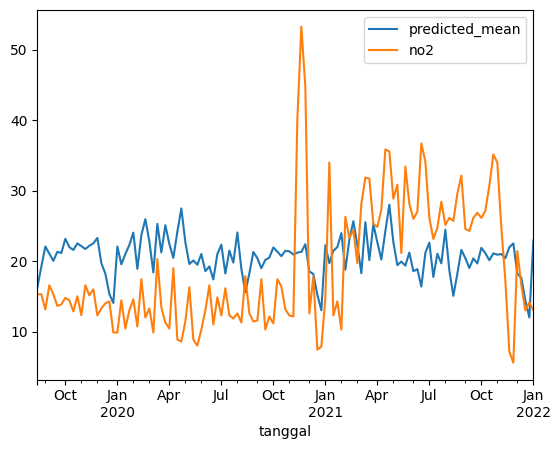

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
tess['no2'].plot(legend=True)

## **Evaluasi Seasonal ARIMA**

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
# Menggunakan fungsi rmse
rmse_value = rmse(test['no2'], predicted_val1['predicted_mean'])

# Menampilkan hasil RMSE
print("RMSE:", rmse_value)

RMSE: 9.317280310112869


# Modelling LSTM

In [ ]:
# mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
load_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',',index_col='tanggal',parse_dates=True)
load_data = load_data.drop(columns='Unnamed: 0')

#Data Frame
df = pd.DataFrame(load_data)
df.head()

pm10   so2    co     o3   no2   max critical categori
tanggal                                                          
2010-01-01  60.0   4.0  73.0  27.00  14.0  73.0       CO   SEDANG
2010-01-02  41.0   7.0  30.0  17.00  13.0  41.0     PM10     BAIK
2010-01-03  60.0   5.0  39.0  44.00  19.0  60.0     PM10   SEDANG
2010-01-04  59.0   5.0  46.0  72.75  21.0  59.0     PM10   SEDANG
2010-01-05  60.0  15.5  24.0  28.00  10.0  60.0     PM10   SEDANG

<Axes: xlabel='tanggal'>

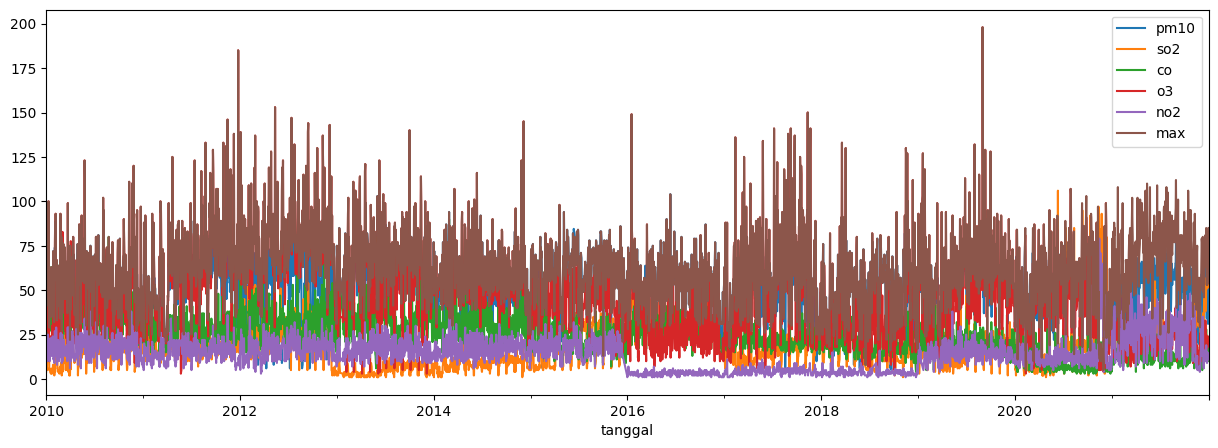

In [ ]:
df.plot(figsize = (15,5))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

##PM10

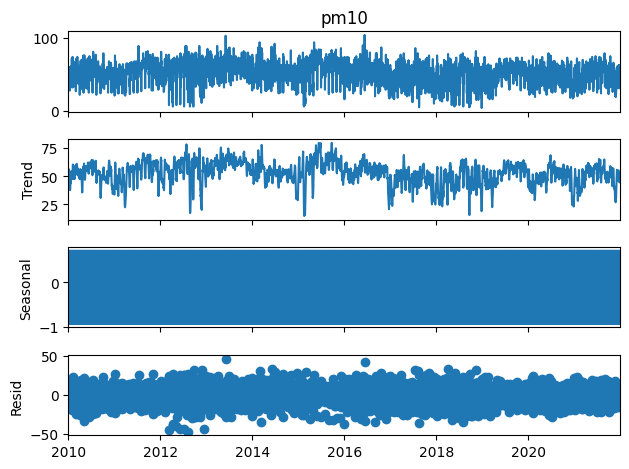

In [ ]:
results = seasonal_decompose(df['pm10'])
results.plot();

In [ ]:
df_data = df['pm10']

In [ ]:
len(df)

4383

In [ ]:
train = df_data.iloc[:3069]
test = df_data.iloc[3069:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_data.head(),df_data.tail()

(tanggal
 2010-01-01    60.0
 2010-01-02    41.0
 2010-01-03    60.0
 2010-01-04    59.0
 2010-01-05    60.0
 Name: pm10, dtype: float64,
 tanggal
 2021-12-27    52.0
 2021-12-28    51.0
 2021-12-29    31.0
 2021-12-30    55.0
 2021-12-31    62.0
 Name: pm10, dtype: float64)

In [ ]:
train_shape = train.values.reshape(-1, 1)
test_shape = test.values.reshape(-1, 1)

In [ ]:
scaler.fit(train_shape)
scaled_train = scaler.transform(train_shape)
scaled_test = scaler.transform(test_shape)

In [ ]:
scaled_train[:10]

array([[0.55555556],
       [0.36363636],
       [0.55555556],
       [0.54545455],
       [0.55555556],
       [0.50505051],
       [0.50505051],
       [0.43434343],
       [0.48484848],
       [0.49494949]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.55555556 0.36363636 0.55555556]
Predict this y: 
 [[0.54545455]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=5)

Epoch 1/5
3057/3057 [==============================] - 53s 17ms/step - loss: 0.0184
Epoch 2/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0169
Epoch 3/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0168
Epoch 4/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0167
Epoch 5/5
3057/3057 [==============================] - 30s 10ms/step - loss: 0.0166


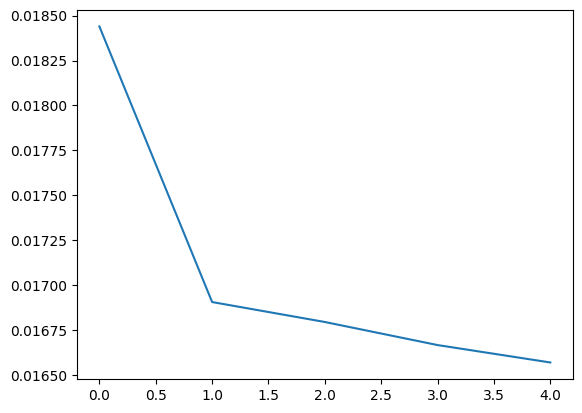

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 190ms/step


array([[0.31551796]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.34006734])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 35ms/step


In [ ]:
test_predictions

[array([0.31551796], dtype=float32),
 array([0.3603729], dtype=float32),
 array([0.39468658], dtype=float32),
 array([0.42065156], dtype=float32),
 array([0.44028342], dtype=float32),
 array([0.4551432], dtype=float32),
 array([0.4665789], dtype=float32),
 array([0.4752658], dtype=float32),
 array([0.48204213], dtype=float32),
 array([0.48760033], dtype=float32),
 array([0.49167347], dtype=float32),
 array([0.4951809], dtype=float32),
 array([0.4980628], dtype=float32),
 array([0.50033003], dtype=float32),
 array([0.50214255], dtype=float32),
 array([0.5035878], dtype=float32),
 array([0.50474066], dtype=float32),
 array([0.5056605], dtype=float32),
 array([0.50639373], dtype=float32),
 array([0.5069781], dtype=float32),
 array([0.50744414], dtype=float32),
 array([0.50781614], dtype=float32),
 array([0.5081126], dtype=float32),
 array([0.5083496], dtype=float32),
 array([0.5085389], dtype=float32),
 array([0.5086899], dtype=float32),
 array([0.50881046], dtype=float32),
 array([0.5089

In [ ]:
test = pd.DataFrame(test)
test

pm10
tanggal              
2018-05-28  38.666667
2018-05-29  55.000000
2018-05-30  67.000000
2018-05-31  43.000000
2018-06-01  18.000000
...               ...
2021-12-27  52.000000
2021-12-28  51.000000
2021-12-29  31.000000
2021-12-30  55.000000
2021-12-31  62.000000

[1314 rows x 1 columns]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
tp = pd.DataFrame(true_predictions,columns=['pred'])
tp

pred
0     36.236278
1     40.676917
2     44.073971
3     46.644504
4     48.588058
...         ...
1309  55.419419
1310  55.419419
1311  55.419419
1312  55.419419
1313  55.419419

[1314 rows x 1 columns]

In [ ]:
from datetime import datetime, timedelta

# Tentukan rentang waktu dari 1 Januari 2023 hingga 1 Januari 2025
start_date = datetime(2018, 5, 28)
end_date = datetime(2021, 12, 31)

# Buat list tanggal menggunakan pandas date_range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Buat DataFrame dengan kolom 'Datetime'
df_pred = pd.DataFrame({'Datetime': date_range})

# Tampilkan DataFrame
print(df_pred)

       Datetime
0    2018-05-28
1    2018-05-29
2    2018-05-30
3    2018-05-31
4    2018-06-01
...         ...
1309 2021-12-27
1310 2021-12-28
1311 2021-12-29
1312 2021-12-30
1313 2021-12-31

[1314 rows x 1 columns]


In [ ]:
tp['tanggal'] = df_pred
tp

pred    tanggal
0     36.236278 2018-05-28
1     40.676917 2018-05-29
2     44.073971 2018-05-30
3     46.644504 2018-05-31
4     48.588058 2018-06-01
...         ...        ...
1309  55.419419 2021-12-27
1310  55.419419 2021-12-28
1311  55.419419 2021-12-29
1312  55.419419 2021-12-30
1313  55.419419 2021-12-31

[1314 rows x 2 columns]

In [ ]:
tp = tp.set_index('tanggal')
tp

pred
tanggal              
2018-05-28  36.236278
2018-05-29  40.676917
2018-05-30  44.073971
2018-05-31  46.644504
2018-06-01  48.588058
...               ...
2021-12-27  55.419419
2021-12-28  55.419419
2021-12-29  55.419419
2021-12-30  55.419419
2021-12-31  55.419419

[1314 rows x 1 columns]

In [ ]:
result = pd.concat([test,tp],axis=1)
result

pm10       pred
tanggal                         
2018-05-28  38.666667  36.236278
2018-05-29  55.000000  40.676917
2018-05-30  67.000000  44.073971
2018-05-31  43.000000  46.644504
2018-06-01  18.000000  48.588058
...               ...        ...
2021-12-27  52.000000  55.419419
2021-12-28  51.000000  55.419419
2021-12-29  31.000000  55.419419
2021-12-30  55.000000  55.419419
2021-12-31  62.000000  55.419419

[1314 rows x 2 columns]

<Axes: xlabel='tanggal'>

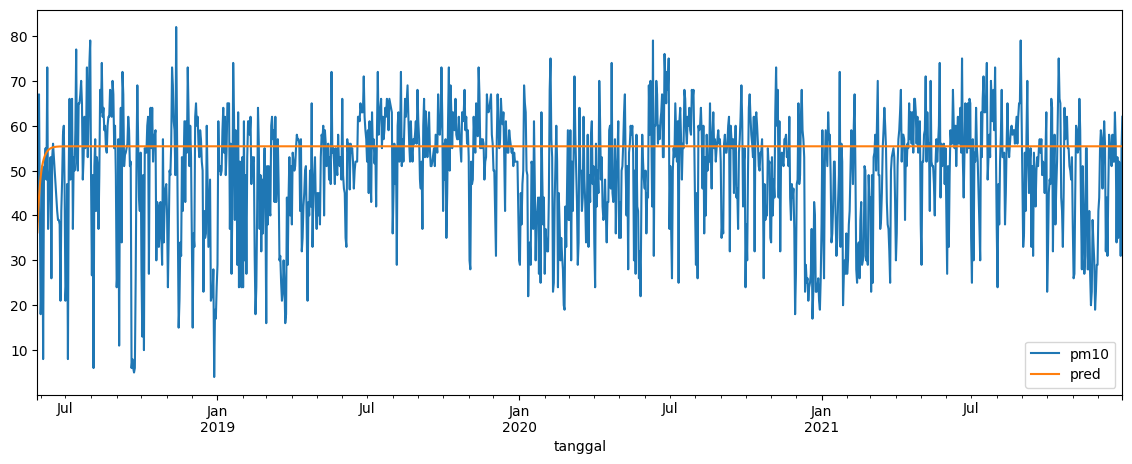

In [ ]:
result.plot(figsize=(14,5))

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

mean_absolute_percentage_error(result['pm10'], result['pred'])

0.3467905853973242

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(result['pm10'],result['pred']))
print(rmse)

14.423023028138209


##SO2

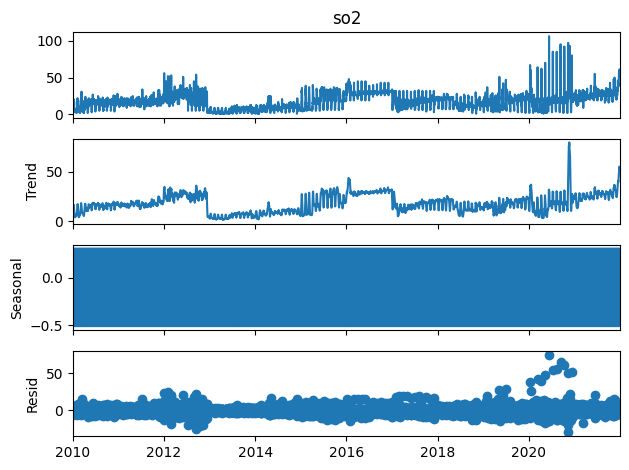

In [ ]:
results_so2 = seasonal_decompose(df['so2'])
results_so2.plot();

In [ ]:
df_data = df['so2']

In [ ]:
len(df)

4383

In [ ]:
train = df_data.iloc[:3069]
test = df_data.iloc[3069:]

In [ ]:
df_data.head(),df_data.tail()

(tanggal
 2010-01-01     4.0
 2010-01-02     7.0
 2010-01-03     5.0
 2010-01-04     5.0
 2010-01-05    15.5
 Name: so2, dtype: float64,
 tanggal
 2021-12-27    61.0
 2021-12-28    53.0
 2021-12-29    54.0
 2021-12-30    53.0
 2021-12-31    52.0
 Name: so2, dtype: float64)

In [ ]:
train_shape = train.values.reshape(-1, 1)
test_shape = test.values.reshape(-1, 1)

In [ ]:
scaler.fit(train_shape)
scaled_train = scaler.transform(train_shape)
scaled_test = scaler.transform(test_shape)

In [ ]:
scaled_train[:10]

array([[0.05454545],
       [0.10909091],
       [0.07272727],
       [0.07272727],
       [0.26363636],
       [0.34545455],
       [0.36363636],
       [0.2       ],
       [0.27272727],
       [0.29090909]])

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.05454545 0.10909091 0.07272727]
Predict this y: 
 [[0.07272727]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=5)

Epoch 1/5
3057/3057 [==============================] - 35s 11ms/step - loss: 0.0101
Epoch 2/5
3057/3057 [==============================] - 34s 11ms/step - loss: 0.0084
Epoch 3/5
3057/3057 [==============================] - 32s 10ms/step - loss: 0.0084
Epoch 4/5
3057/3057 [==============================] - 32s 10ms/step - loss: 0.0082
Epoch 5/5
3057/3057 [==============================] - 32s 10ms/step - loss: 0.0082


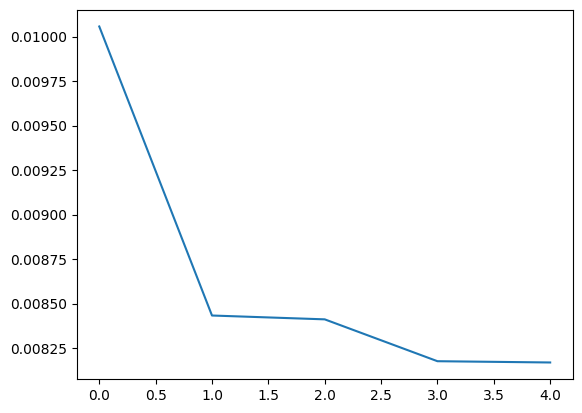

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 178ms/step


array([[0.25919077]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.24242424])

In [ ]:
test_predictions_so2 = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions_so2.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 21ms/step


In [ ]:
test_predictions

[array([0.31551796], dtype=float32),
 array([0.3603729], dtype=float32),
 array([0.39468658], dtype=float32),
 array([0.42065156], dtype=float32),
 array([0.44028342], dtype=float32),
 array([0.4551432], dtype=float32),
 array([0.4665789], dtype=float32),
 array([0.4752658], dtype=float32),
 array([0.48204213], dtype=float32),
 array([0.48760033], dtype=float32),
 array([0.49167347], dtype=float32),
 array([0.4951809], dtype=float32),
 array([0.4980628], dtype=float32),
 array([0.50033003], dtype=float32),
 array([0.50214255], dtype=float32),
 array([0.5035878], dtype=float32),
 array([0.50474066], dtype=float32),
 array([0.5056605], dtype=float32),
 array([0.50639373], dtype=float32),
 array([0.5069781], dtype=float32),
 array([0.50744414], dtype=float32),
 array([0.50781614], dtype=float32),
 array([0.5081126], dtype=float32),
 array([0.5083496], dtype=float32),
 array([0.5085389], dtype=float32),
 array([0.5086899], dtype=float32),
 array([0.50881046], dtype=float32),
 array([0.5089

In [ ]:
test = pd.DataFrame(test)
test

so2
tanggal              
2018-05-28  14.333333
2018-05-29  13.000000
2018-05-30  12.000000
2018-05-31  13.000000
2018-06-01  19.000000
...               ...
2021-12-27  61.000000
2021-12-28  53.000000
2021-12-29  54.000000
2021-12-30  53.000000
2021-12-31  52.000000

[1314 rows x 1 columns]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
tp = pd.DataFrame(true_predictions,columns=['pred'])
tp

pred
0     18.353488
1     20.820510
2     22.707762
3     24.135836
4     25.215588
...         ...
1309  29.010788
1310  29.010788
1311  29.010788
1312  29.010788
1313  29.010788

[1314 rows x 1 columns]

In [ ]:
from datetime import datetime, timedelta

# Tentukan rentang waktu dari 1 Januari 2023 hingga 1 Januari 2025
start_date = datetime(2018, 5, 28)
end_date = datetime(2021, 12, 31)

# Buat list tanggal menggunakan pandas date_range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Buat DataFrame dengan kolom 'Datetime'
df_pred = pd.DataFrame({'Datetime': date_range})

# Tampilkan DataFrame
print(df_pred)

       Datetime
0    2018-05-28
1    2018-05-29
2    2018-05-30
3    2018-05-31
4    2018-06-01
...         ...
1309 2021-12-27
1310 2021-12-28
1311 2021-12-29
1312 2021-12-30
1313 2021-12-31

[1314 rows x 1 columns]


In [ ]:
tp['tanggal'] = df_pred
tp

pred    tanggal
0     18.353488 2018-05-28
1     20.820510 2018-05-29
2     22.707762 2018-05-30
3     24.135836 2018-05-31
4     25.215588 2018-06-01
...         ...        ...
1309  29.010788 2021-12-27
1310  29.010788 2021-12-28
1311  29.010788 2021-12-29
1312  29.010788 2021-12-30
1313  29.010788 2021-12-31

[1314 rows x 2 columns]

In [ ]:
tp = tp.set_index('tanggal')
tp

pred
tanggal              
2018-05-28  18.353488
2018-05-29  20.820510
2018-05-30  22.707762
2018-05-31  24.135836
2018-06-01  25.215588
...               ...
2021-12-27  29.010788
2021-12-28  29.010788
2021-12-29  29.010788
2021-12-30  29.010788
2021-12-31  29.010788

[1314 rows x 1 columns]

In [ ]:
result = pd.concat([test,tp],axis=1)
result

so2       pred
tanggal                         
2018-05-28  14.333333  18.353488
2018-05-29  13.000000  20.820510
2018-05-30  12.000000  22.707762
2018-05-31  13.000000  24.135836
2018-06-01  19.000000  25.215588
...               ...        ...
2021-12-27  61.000000  29.010788
2021-12-28  53.000000  29.010788
2021-12-29  54.000000  29.010788
2021-12-30  53.000000  29.010788
2021-12-31  52.000000  29.010788

[1314 rows x 2 columns]

<Axes: xlabel='tanggal'>

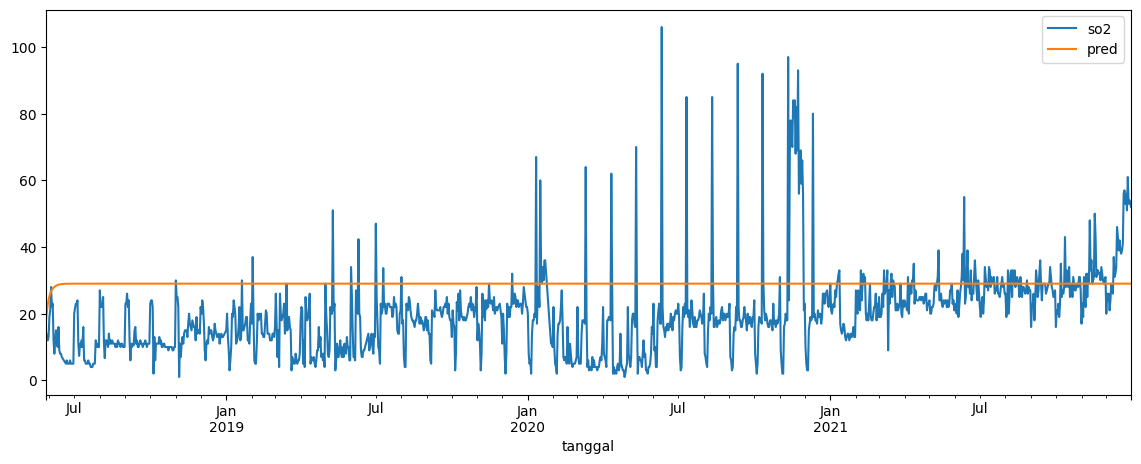

In [ ]:
result.plot(figsize=(14,5))

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

mean_absolute_percentage_error(result['so2'], result['pred'])

1.377868886025455

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(result['so2'],result['pred']))
print(rmse)

15.52877581875163


## CO

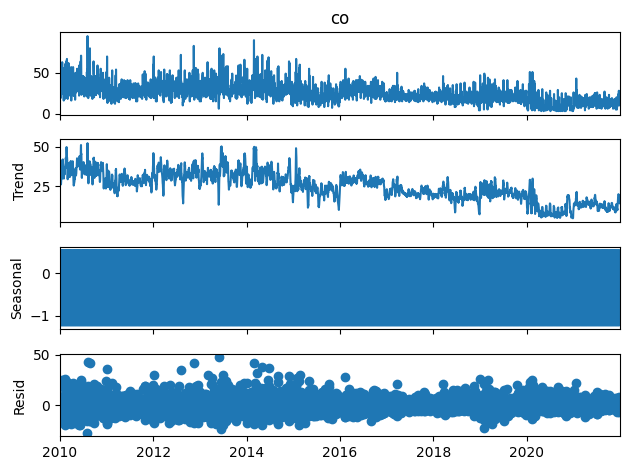

In [ ]:
results_co = seasonal_decompose(df['co'])
results_co.plot();

In [ ]:
df_data = df['co']

In [ ]:
len(df)

4383

In [ ]:
train = df_data.iloc[:3069]
test = df_data.iloc[3069:]

In [ ]:
df_data.head(),df_data.tail()

(tanggal
 2010-01-01    73.0
 2010-01-02    30.0
 2010-01-03    39.0
 2010-01-04    46.0
 2010-01-05    24.0
 Name: co, dtype: float64,
 tanggal
 2021-12-27    15.0
 2021-12-28    15.0
 2021-12-29    10.0
 2021-12-30    16.0
 2021-12-31    23.0
 Name: co, dtype: float64)

In [ ]:
train_shape = train.values.reshape(-1, 1)
test_shape = test.values.reshape(-1, 1)

In [ ]:
scaler.fit(train_shape)
scaled_train = scaler.transform(train_shape)
scaled_test = scaler.transform(test_shape)

In [ ]:
scaled_train[:10]

array([[0.75280899],
       [0.26966292],
       [0.37078652],
       [0.4494382 ],
       [0.20224719],
       [0.3258427 ],
       [0.21348315],
       [0.14606742],
       [0.24719101],
       [0.29213483]])

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.75280899 0.26966292 0.37078652]
Predict this y: 
 [[0.4494382]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=5)

Epoch 1/5
3057/3057 [==============================] - 33s 10ms/step - loss: 0.0098
Epoch 2/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0094
Epoch 3/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0092
Epoch 4/5
3057/3057 [==============================] - 30s 10ms/step - loss: 0.0092
Epoch 5/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0091


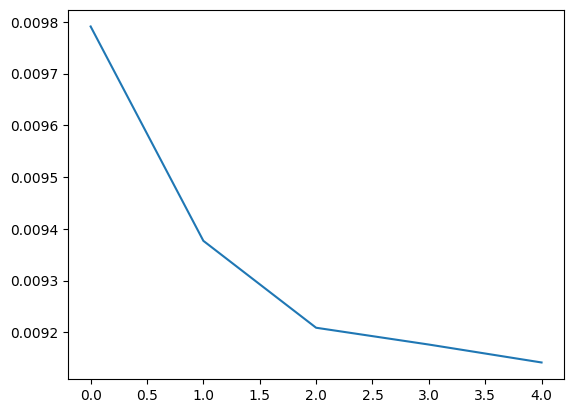

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 212ms/step


array([[0.16939798]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.15730337])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 29ms/step


In [ ]:
test_predictions

[array([0.16939798], dtype=float32),
 array([0.16947296], dtype=float32),
 array([0.17021242], dtype=float32),
 array([0.17254119], dtype=float32),
 array([0.1757508], dtype=float32),
 array([0.1775591], dtype=float32),
 array([0.1794484], dtype=float32),
 array([0.18214254], dtype=float32),
 array([0.18580171], dtype=float32),
 array([0.18965444], dtype=float32),
 array([0.19299664], dtype=float32),
 array([0.19502403], dtype=float32),
 array([0.19739419], dtype=float32),
 array([0.20005903], dtype=float32),
 array([0.20280232], dtype=float32),
 array([0.20561486], dtype=float32),
 array([0.20846285], dtype=float32),
 array([0.21131888], dtype=float32),
 array([0.21421693], dtype=float32),
 array([0.21715753], dtype=float32),
 array([0.22012866], dtype=float32),
 array([0.22311984], dtype=float32),
 array([0.22612166], dtype=float32),
 array([0.229121], dtype=float32),
 array([0.232144], dtype=float32),
 array([0.23518544], dtype=float32),
 array([0.23823653], dtype=float32),
 array([

In [ ]:
test = pd.DataFrame(test)
test

co
tanggal         
2018-05-28  20.0
2018-05-29  18.0
2018-05-30  18.0
2018-05-31  17.0
2018-06-01  14.0
...          ...
2021-12-27  15.0
2021-12-28  15.0
2021-12-29  10.0
2021-12-30  16.0
2021-12-31  23.0

[1314 rows x 1 columns]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
tp = pd.DataFrame(true_predictions,columns=['pred'])
tp

pred
0     21.076420
1     21.083094
2     21.148905
3     21.356166
4     21.641822
...         ...
1309  34.260964
1310  34.260964
1311  34.260964
1312  34.260964
1313  34.260964

[1314 rows x 1 columns]

In [ ]:
from datetime import datetime, timedelta

# Tentukan rentang waktu dari 1 Januari 2023 hingga 1 Januari 2025
start_date = datetime(2018, 5, 28)
end_date = datetime(2021, 12, 31)

# Buat list tanggal menggunakan pandas date_range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Buat DataFrame dengan kolom 'Datetime'
df_pred = pd.DataFrame({'Datetime': date_range})

# Tampilkan DataFrame
print(df_pred)

       Datetime
0    2018-05-28
1    2018-05-29
2    2018-05-30
3    2018-05-31
4    2018-06-01
...         ...
1309 2021-12-27
1310 2021-12-28
1311 2021-12-29
1312 2021-12-30
1313 2021-12-31

[1314 rows x 1 columns]


In [ ]:
tp['tanggal'] = df_pred
tp

pred    tanggal
0     21.076420 2018-05-28
1     21.083094 2018-05-29
2     21.148905 2018-05-30
3     21.356166 2018-05-31
4     21.641822 2018-06-01
...         ...        ...
1309  34.260964 2021-12-27
1310  34.260964 2021-12-28
1311  34.260964 2021-12-29
1312  34.260964 2021-12-30
1313  34.260964 2021-12-31

[1314 rows x 2 columns]

In [ ]:
tp = tp.set_index('tanggal')
tp

pred
tanggal              
2018-05-28  21.076420
2018-05-29  21.083094
2018-05-30  21.148905
2018-05-31  21.356166
2018-06-01  21.641822
...               ...
2021-12-27  34.260964
2021-12-28  34.260964
2021-12-29  34.260964
2021-12-30  34.260964
2021-12-31  34.260964

[1314 rows x 1 columns]

In [ ]:
result = pd.concat([test,tp],axis=1)
result

co       pred
tanggal                    
2018-05-28  20.0  21.076420
2018-05-29  18.0  21.083094
2018-05-30  18.0  21.148905
2018-05-31  17.0  21.356166
2018-06-01  14.0  21.641822
...          ...        ...
2021-12-27  15.0  34.260964
2021-12-28  15.0  34.260964
2021-12-29  10.0  34.260964
2021-12-30  16.0  34.260964
2021-12-31  23.0  34.260964

[1314 rows x 2 columns]

<Axes: xlabel='tanggal'>

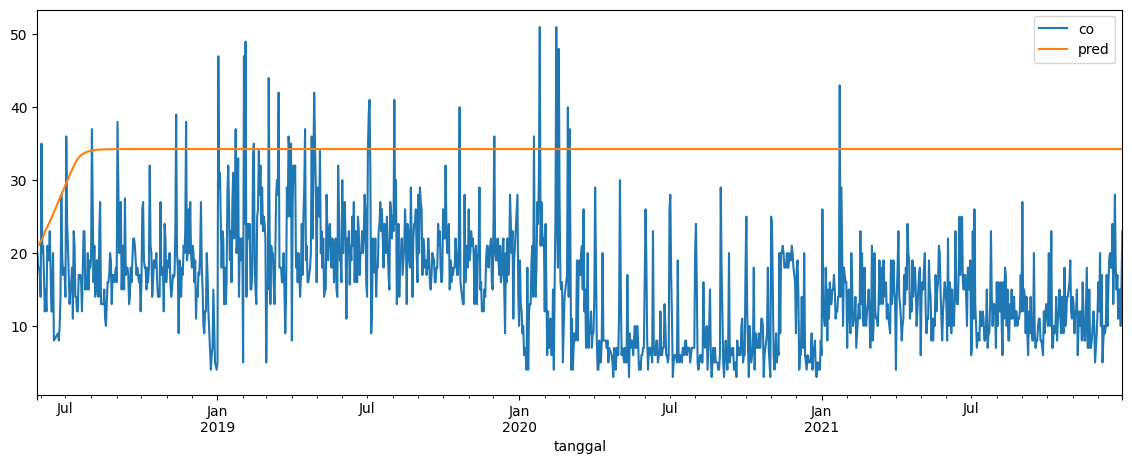

In [ ]:
result.plot(figsize=(14,5))

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

mean_absolute_percentage_error(result['co'], result['pred'])

1.9235906989797273

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(result['co'],result['pred']))
print(rmse)

20.04134461626743


##O3

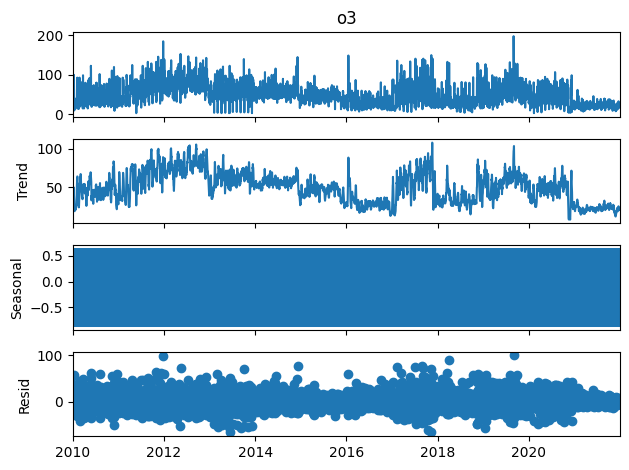

In [ ]:
results_co3 = seasonal_decompose(df['o3'])
results_co3.plot();

In [ ]:
df_data = df['o3']

In [ ]:
train = df_data.iloc[:3069]
test = df_data.iloc[3069:]

In [ ]:
df_data.head(),df_data.tail()

(tanggal
 2010-01-01    27.00
 2010-01-02    17.00
 2010-01-03    44.00
 2010-01-04    72.75
 2010-01-05    28.00
 Name: o3, dtype: float64,
 tanggal
 2021-12-27    20.0
 2021-12-28    18.0
 2021-12-29    24.0
 2021-12-30    23.0
 2021-12-31    20.0
 Name: o3, dtype: float64)

In [ ]:
train_shape = train.values.reshape(-1, 1)
test_shape = test.values.reshape(-1, 1)

In [ ]:
scaler.fit(train_shape)
scaled_train = scaler.transform(train_shape)
scaled_test = scaler.transform(test_shape)

In [ ]:
scaled_train[:10]

array([[0.13186813],
       [0.07692308],
       [0.22527473],
       [0.38324176],
       [0.13736264],
       [0.15384615],
       [0.13186813],
       [0.24175824],
       [0.21978022],
       [0.53296703]])

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.13186813 0.07692308 0.22527473]
Predict this y: 
 [[0.38324176]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=5)

Epoch 1/5
3057/3057 [==============================] - 34s 10ms/step - loss: 0.0137
Epoch 2/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0126
Epoch 3/5
3057/3057 [==============================] - 32s 10ms/step - loss: 0.0123
Epoch 4/5
3057/3057 [==============================] - 32s 10ms/step - loss: 0.0122
Epoch 5/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0121


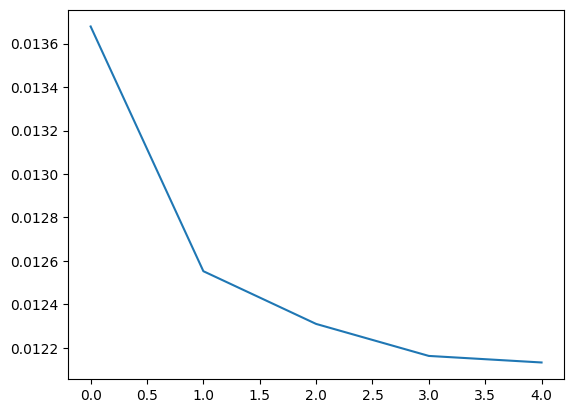

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 185ms/step


array([[0.13914049]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.11538462])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 23ms/step


In [ ]:
test_predictions

[array([0.13914049], dtype=float32),
 array([0.14460318], dtype=float32),
 array([0.14898214], dtype=float32),
 array([0.1530976], dtype=float32),
 array([0.15529506], dtype=float32),
 array([0.15839195], dtype=float32),
 array([0.15849411], dtype=float32),
 array([0.16008851], dtype=float32),
 array([0.16047698], dtype=float32),
 array([0.16089535], dtype=float32),
 array([0.16174534], dtype=float32),
 array([0.16286078], dtype=float32),
 array([0.16405527], dtype=float32),
 array([0.16499823], dtype=float32),
 array([0.16584688], dtype=float32),
 array([0.166618], dtype=float32),
 array([0.1673147], dtype=float32),
 array([0.16798612], dtype=float32),
 array([0.16860531], dtype=float32),
 array([0.16921891], dtype=float32),
 array([0.16980962], dtype=float32),
 array([0.17037886], dtype=float32),
 array([0.1709314], dtype=float32),
 array([0.1714665], dtype=float32),
 array([0.17198175], dtype=float32),
 array([0.17247376], dtype=float32),
 array([0.17294542], dtype=float32),
 array(

In [ ]:
test = pd.DataFrame(test)
test

o3
tanggal         
2018-05-28  24.0
2018-05-29  28.0
2018-05-30  45.0
2018-05-31  35.0
2018-06-01  24.0
...          ...
2021-12-27  20.0
2021-12-28  18.0
2021-12-29  24.0
2021-12-30  23.0
2021-12-31  20.0

[1314 rows x 1 columns]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
tp = pd.DataFrame(true_predictions,columns=['pred'])
tp

pred
0     28.323569
1     29.317778
2     30.114749
3     30.863763
4     31.263701
...         ...
1309  37.014043
1310  37.014043
1311  37.014043
1312  37.014043
1313  37.014043

[1314 rows x 1 columns]

In [ ]:
from datetime import datetime, timedelta

# Tentukan rentang waktu dari 1 Januari 2023 hingga 1 Januari 2025
start_date = datetime(2018, 5, 28)
end_date = datetime(2021, 12, 31)

# Buat list tanggal menggunakan pandas date_range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Buat DataFrame dengan kolom 'Datetime'
df_pred = pd.DataFrame({'Datetime': date_range})

# Tampilkan DataFrame
print(df_pred)

       Datetime
0    2018-05-28
1    2018-05-29
2    2018-05-30
3    2018-05-31
4    2018-06-01
...         ...
1309 2021-12-27
1310 2021-12-28
1311 2021-12-29
1312 2021-12-30
1313 2021-12-31

[1314 rows x 1 columns]


In [ ]:
tp['tanggal'] = df_pred
tp

pred    tanggal
0     28.323569 2018-05-28
1     29.317778 2018-05-29
2     30.114749 2018-05-30
3     30.863763 2018-05-31
4     31.263701 2018-06-01
...         ...        ...
1309  37.014043 2021-12-27
1310  37.014043 2021-12-28
1311  37.014043 2021-12-29
1312  37.014043 2021-12-30
1313  37.014043 2021-12-31

[1314 rows x 2 columns]

In [ ]:
tp = tp.set_index('tanggal')
tp

pred
tanggal              
2018-05-28  28.323569
2018-05-29  29.317778
2018-05-30  30.114749
2018-05-31  30.863763
2018-06-01  31.263701
...               ...
2021-12-27  37.014043
2021-12-28  37.014043
2021-12-29  37.014043
2021-12-30  37.014043
2021-12-31  37.014043

[1314 rows x 1 columns]

In [ ]:
result = pd.concat([test,tp],axis=1)
result

o3       pred
tanggal                    
2018-05-28  24.0  28.323569
2018-05-29  28.0  29.317778
2018-05-30  45.0  30.114749
2018-05-31  35.0  30.863763
2018-06-01  24.0  31.263701
...          ...        ...
2021-12-27  20.0  37.014043
2021-12-28  18.0  37.014043
2021-12-29  24.0  37.014043
2021-12-30  23.0  37.014043
2021-12-31  20.0  37.014043

[1314 rows x 2 columns]

<Axes: xlabel='tanggal'>

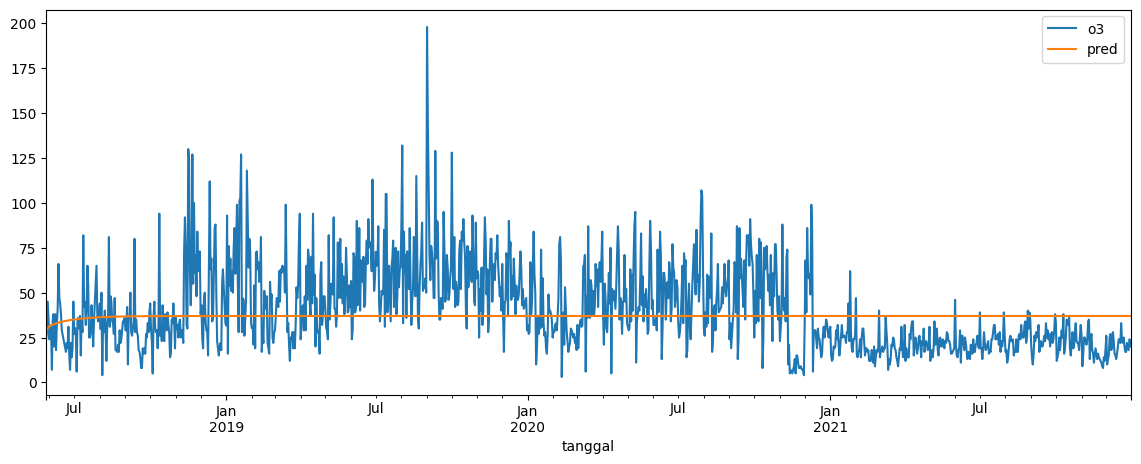

In [ ]:
result.plot(figsize=(14,5))

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

mean_absolute_percentage_error(result['o3'], result['pred'])

0.6257966588373202

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(result['o3'],result['pred']))
print(rmse)

23.622786655300256


## NO2

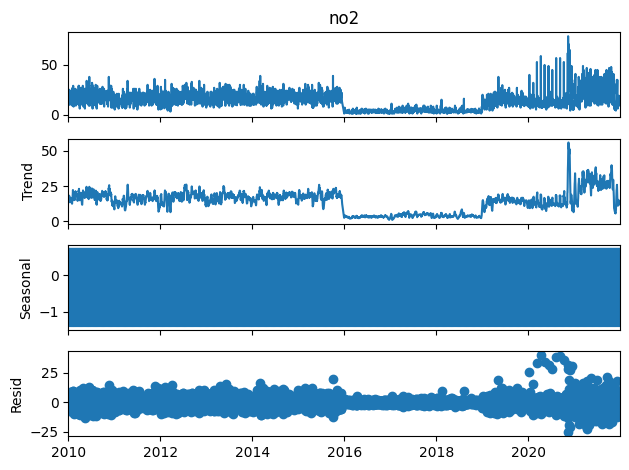

In [ ]:
results = seasonal_decompose(df['no2'])
results.plot();

In [ ]:
df_data = df['no2']

In [ ]:
len(df)

4383

In [ ]:
train = df_data.iloc[:3069]
test = df_data.iloc[3069:]

In [ ]:
df_data.head(),df_data.tail()

(tanggal
 2010-01-01    14.0
 2010-01-02    13.0
 2010-01-03    19.0
 2010-01-04    21.0
 2010-01-05    10.0
 Name: no2, dtype: float64,
 tanggal
 2021-12-27    15.0
 2021-12-28    13.0
 2021-12-29    11.0
 2021-12-30    14.0
 2021-12-31    14.0
 Name: no2, dtype: float64)

In [ ]:
train_shape = train.values.reshape(-1, 1)
test_shape = test.values.reshape(-1, 1)

In [ ]:
scaler.fit(train_shape)
scaled_train = scaler.transform(train_shape)
scaled_test = scaler.transform(test_shape)

In [ ]:
scaled_train[:10]

array([[0.34210526],
       [0.31578947],
       [0.47368421],
       [0.52631579],
       [0.23684211],
       [0.5       ],
       [0.28947368],
       [0.63157895],
       [0.39473684],
       [0.57894737]])

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.34210526 0.31578947 0.47368421]
Predict this y: 
 [[0.52631579]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=5)

Epoch 1/5
3057/3057 [==============================] - 33s 10ms/step - loss: 0.0151
Epoch 2/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0136
Epoch 3/5
3057/3057 [==============================] - 30s 10ms/step - loss: 0.0134
Epoch 4/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0132
Epoch 5/5
3057/3057 [==============================] - 31s 10ms/step - loss: 0.0131


In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

In [ ]:
scaled_test[0]

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [ ]:
test_predictions

In [ ]:
test = pd.DataFrame(test)
test

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
tp = pd.DataFrame(true_predictions,columns=['pred'])
tp

In [ ]:
from datetime import datetime, timedelta

# Tentukan rentang waktu dari 1 Januari 2023 hingga 1 Januari 2025
start_date = datetime(2018, 5, 28)
end_date = datetime(2021, 12, 31)

# Buat list tanggal menggunakan pandas date_range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Buat DataFrame dengan kolom 'Datetime'
df_pred = pd.DataFrame({'Datetime': date_range})

# Tampilkan DataFrame
print(df_pred)

In [ ]:
tp['tanggal'] = df_pred
tp

In [ ]:
tp = tp.set_index('tanggal')
tp

In [ ]:
result = pd.concat([test,tp],axis=1)
result

In [ ]:
result.plot(figsize=(14,5))

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

mean_absolute_percentage_error(result['no2'], result['pred'])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(result['no2'],result['pred']))
print(rmse)